In [15]:
from typing import Callable, List, Optional, Iterable
from pathlib import Path
import os
from copy import deepcopy
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import multiprocessing as mp
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

# DATA_DIR = "./pytorch_soo/experiments/expt_rslts_sgd_linear_probe_no_qlora/"
# DATA_DIR = "./pytorch_soo/experiments/expt_rslts_bfgs_linear_probe_no_qlora/"

#RUN combining_TEMP.py first, then have the below variable point to the output directory with all the jsons.
DATA_DIR = "./pytorch_soo/experiments/all_results"
# PICKLE_NAME = "nn_rslts_df.pkl"
PICKLE_NAME = "all_nn_rslts_df.pkl"
IMG_OUTPUT_DIR = Path("imgs/")
IMG_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
TABLE_OUTPUT_DIR = Path("tables/")
TABLE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

OPT_OF_INTEREST = ("sgd", "kn", "fr", "pr", "hs", "dy", "bfgs")
DISCRIMINATE_FGD = False
if DISCRIMINATE_FGD:
    OPT_OF_INTEREST = ("fgd", "sgd", "kn", "fr", "pr", "hs", "dy", "bfgs")

# Truncate the opts of interest...
OPT_OF_INTEREST = ("sgd", "fr", "bfgs")


DROP_N_EQUALS_TWO = True

NAME_DICT = {
    "sgd": "Stochastic Gradient Descent",
    "fgd": "Full Gradient Descent",
    "kn": "Krylov-Newton",
    "fr": "Fletcher-Reeves",
    "pr": "Polak-Ribiere",
    "hs": "Hestenes-Stiefel",
    "dy": "Dai-Yuan",
    "bfgs": "BFGS",
    "bfgsi": "BFGS Inverse",
    "dfp": "Davidon-Fletcher-Powell",
    "dfpi": "Davidon-Fletcher-Powell Inverse",
    "sr1": "Symmetric Rank-One",
    "sr1d": "Symmetric Rank-One Dual",
    "levenberg": "Levenberg"
}

def read_json_to_df(fname):
    try:
        with open(fname) as f:
            tmp_df = pd.json_normalize(json.load(f))
            return tmp_df
    except Exception:
        return None

if not os.path.exists(PICKLE_NAME):
    print("Creating dataframe!")
    assert(os.path.exists(DATA_DIR))
    f_list = glob.glob(os.path.join(DATA_DIR, "TEST_*.json"))
    print("Number of files:", len(f_list))
    with mp.Pool() as p:
        dframes = p.map(read_json_to_df, f_list)
    #dframes = [read_json_to_df(i) for i in f_list]
    dframes = [i for i in dframes if i is not None]
    monolith = pd.concat(dframes)
    monolith.to_pickle(PICKLE_NAME)

else:
    print("Reading dataframe!")
    monolith = pd.read_pickle(PICKLE_NAME)

monolith.keys()

Creating dataframe!
Number of files: 428


Index(['time', 'train_loss_list', 'test_loss_list', 'test_accuracy_list',
       'train_accuracy_list', 'specs.opt', 'specs.dataset',
       'specs.batch_size_train', 'specs.batch_size_test', 'specs.momentum',
       'specs.hidden', 'specs.max_newton', 'specs.abs_newton_tol',
       'specs.rel_newton_tol', 'specs.max_cr', 'specs.cr_tol',
       'specs.learning_rate', 'specs.sufficient_decrease',
       'specs.curvature_condition', 'specs.extrapolation_factor',
       'specs.max_searches', 'specs.initial_radius', 'specs.max_radius',
       'specs.nabla0', 'specs.nabla1', 'specs.nabla2', 'specs.shrink_factor',
       'specs.growth_factor', 'specs.max_subproblem_iter', 'specs.num_epoch',
       'specs.seed', 'specs.read_nn', 'specs.write_nn', 'specs.log_interval',
       'specs.device', 'specs.record', 'specs.memory'],
      dtype='object')

In [16]:
print("Optimizers:", list(set(monolith["specs.opt"])))
print("Learning rates:", list(set(monolith["specs.learning_rate"])))
print("Momentums:", list(set(monolith["specs.momentum"])))

Optimizers: ['fr', 'sgd', 'bfgs']
Learning rates: [0.8, 0.9, 1.0, 0.5, 0.1, 5.0, 2.0, 10.0, 0.01]
Momentums: [0.0, 0.8, 0.1, 0.5, 0.9]


In [18]:
monolith.head()

time  \
0  [257.02356706373394, 218.30388449132442, 216.3...   
0  [130.71728779934347, 103.34728948026896, 125.7...   
0  [238.03076829575002, 217.5527706257999, 247.37...   
0  [91.57824677973986, 88.80954794213176, 88.8000...   
0  [302.08655930683017, 265.44283524900675, 314.7...   

                                     train_loss_list  \
0  [6.240618944168091, 6.238062620162964, 6.23345...   
0  [6.2331297397613525, 6.229797124862671, 6.2280...   
0  [6.232988357543945, 6.229180097579956, 6.22820...   
0  [10.401884078979492, 10.399928331375122, 10.40...   
0  [10.39819884300232, 10.382909059524536, 10.380...   

                                      test_loss_list  \
0  [0.005213830704079535, 0.005210115198503461, 0...   
0  [0.005206963770969171, 0.005202438598288629, 0...   
0  [0.005206963770969171, 0.005202965031291608, 0...   
0  [0.005213830704079535, 0.005213830704079535, 0...   
0  [0.005209915022503463, 0.005202592166145344, 0...   

                                  test_accuracy_list  \
0  [12.531328320802006, 13.533834586466165, 18.54...   
0  [21.55388471177945, 18.045112781954888, 18.045...   
0  [21.55388471177945, 19.548872180451127, 19.548...   
0  [12.531328320802006, 12.531328320802006, 12.53...   
0  [13.533834586466165, 12.531328320802006, 12.53...   

                                 train_accuracy_list specs.opt  specs.dataset  \
0  [10.95218635063343, 12.055578259092767, 15.897...      bfgs  yahoo_answers   
0  [17.858602370249283, 18.389865140988967, 19.16...      bfgs  yahoo_answers   
0  [17.327339599509603, 19.043727012668572, 19.08...      bfgs  yahoo_answers   
0  [11.442582754393134, 11.646914589293011, 11.31...      bfgs  yahoo_answers   
0  [12.30077646097262, 15.36575398447078, 14.7936...      bfgs  yahoo_answers   

   specs.batch_size_train  specs.batch_size_test  specs.momentum  ...  \
0                    1028                    512             0.0  ...   
0                    1028                    512             0.0  ...   
0                    1028                    512             0.0  ...   
0                     512                    512             0.0  ...   
0                     512                    512             0.0  ...   

   specs.growth_factor  specs.max_subproblem_iter  specs.num_epoch  \
0                 None                       None              100   
0                 None                       None              100   
0                 None                       None              100   
0                 None                       None              100   
0                 None                       None              100   

   specs.seed  specs.read_nn  specs.write_nn  specs.log_interval  \
0       31415           None            True                  10   
0          40           None            True                  10   
0          40           None            True                  10   
0       31415           None            True                  10   
0       31415           None            True                  10   

   specs.device                              specs.record  specs.memory  
0          cuda  ./expt_rslts_bfgs_linear_probe_no_qlora/             1  
0          cuda  ./expt_rslts_bfgs_linear_probe_no_qlora/             1  
0          cuda  ./expt_rslts_bfgs_linear_probe_no_qlora/             2  
0          cuda  ./expt_rslts_bfgs_linear_probe_no_qlora/             2  
0          cuda  ./expt_rslts_bfgs_linear_probe_no_qlora/             2  

[5 rows x 37 columns]

In [19]:
cifar = monolith.loc[monolith["specs.dataset"] == "yahoo_answers"]

In [21]:
cifar["specs.batch_size_train"] = cifar["specs.batch_size_train"].apply(int)
if DISCRIMINATE_FGD:
    print("Entering if statement")
    cifar.loc[(cifar["specs.opt"] == "sgd") & (cifar["specs.batch_size_train"] >= 50000), "specs.opt"] = "fgd"
    cifar.loc[cifar["specs.opt"] == "fgd"]

In [22]:
def max_acc_lambda(row):
    try:
        max_ = max(row["test_accuracy_list"])
    except ValueError:
        max_ = 0.0
    return max_

def final_acc_lambda(row):
    try:
        last = row["test_accuracy_list"][-1]
    except IndexError:
        last = float("NaN")
    return last

cumulative_time_lambda = lambda row: np.cumsum(row["time"])

def total_time_lambda(row):
    try:
        max_ = row["training_timestamps"][-1]
    except IndexError:
        max_ = float("NaN")
    return max_

def time_to_peak_lambda(row):
    try:
        max_idx = np.array(row["test_accuracy_list"]).argmax()
        time_to_peak = np.sum(row["training_timestamps"][:max_idx+1])

    except ValueError:
        time_to_peak = np.inf

    return time_to_peak


def fgd_lambda(row):
    try:
        opt_name = row["specs.opt"]
        batch_size_train = int(row["specs.batch_size_train"])
        if opt_name == "sgd" and batch_size_train >= 50000:
            row["specs.opt"] = "fgd"
    except ValueError:
        print(f"row failed: {row['specs.opt']}")


def apply_lambda(df: pd.DataFrame, colname: str, func: Callable):
    tmp = df.apply(func, axis=1)
    df[colname] = tmp.copy()

    return df

def get_summary_vals(df: pd.DataFrame):
    df = apply_lambda(df, "top_test_acc", max_acc_lambda)
    df = apply_lambda(df, "final_test_acc", final_acc_lambda)
    df = apply_lambda(df, "training_timestamps", cumulative_time_lambda)
    df = apply_lambda(df, "total_training_time", total_time_lambda)
    df = apply_lambda(df, "time_to_peak_acc", time_to_peak_lambda)
    df = df.dropna(subset=["total_training_time"])
    if DROP_N_EQUALS_TWO:
        df = df[df["specs.batch_size_train"] > 2]

    return df

cifar = get_summary_vals(cifar)

In [23]:
cifar

time  \
0   [257.02356706373394, 218.30388449132442, 216.3...   
0   [130.71728779934347, 103.34728948026896, 125.7...   
0   [238.03076829575002, 217.5527706257999, 247.37...   
0   [91.57824677973986, 88.80954794213176, 88.8000...   
0   [302.08655930683017, 265.44283524900675, 314.7...   
..                                                ...   
0   [47.97633115714416, 47.94907645415515, 47.9515...   
0   [62.615044482052326, 62.039195124059916, 73.43...   
0   [48.35693677794188, 47.97816550871357, 47.9821...   
0   [62.11160849686712, 62.08494430221617, 68.7898...   
0   [39.34650219976902, 42.796758780255914, 39.314...   

                                      train_loss_list  \
0   [6.240618944168091, 6.238062620162964, 6.23345...   
0   [6.2331297397613525, 6.229797124862671, 6.2280...   
0   [6.232988357543945, 6.229180097579956, 6.22820...   
0   [10.401884078979492, 10.399928331375122, 10.40...   
0   [10.39819884300232, 10.382909059524536, 10.380...   
..                                                ...   
0   [6.201645851135254, 6.126796722412109, 5.92292...   
0   [10.29287600517273, 9.939651370048523, 9.44890...   
0   [6.198917627334595, 6.121413707733154, 5.95428...   
0   [10.305741548538208, 10.030083775520325, 9.356...   
0   [10.398116111755371, 10.39334511756897, 10.388...   

                                       test_loss_list  \
0   [0.005213830704079535, 0.005210115198503461, 0...   
0   [0.005206963770969171, 0.005202438598288629, 0...   
0   [0.005206963770969171, 0.005202965031291608, 0...   
0   [0.005213830704079535, 0.005213830704079535, 0...   
0   [0.005209915022503463, 0.005202592166145344, 0...   
..                                                ...   
0   [0.005171260738133786, 0.005083514335460232, 0...   
0   [0.005121504752558276, 0.0048820377890029945, ...   
0   [0.005163390534862241, 0.005086585095054225, 0...   
0   [0.005134227580593941, 0.004945479240035054, 0...   
0   [0.005211668803279561, 0.005209205742169144, 0...   

                                   test_accuracy_list  \
0   [12.531328320802006, 13.533834586466165, 18.54...   
0   [21.55388471177945, 18.045112781954888, 18.045...   
0   [21.55388471177945, 19.548872180451127, 19.548...   
0   [12.531328320802006, 12.531328320802006, 12.53...   
0   [13.533834586466165, 12.531328320802006, 12.53...   
..                                                ...   
0   [27.06766917293233, 28.07017543859649, 37.5939...   
0   [37.84461152882206, 46.8671679197995, 46.11528...   
0   [35.83959899749373, 60.65162907268171, 37.8446...   
0   [37.092731829573935, 50.87719298245614, 59.398...   
0   [17.04260651629073, 19.047619047619047, 21.303...   

                                  train_accuracy_list specs.opt  \
0   [10.95218635063343, 12.055578259092767, 15.897...      bfgs   
0   [17.858602370249283, 18.389865140988967, 19.16...      bfgs   
0   [17.327339599509603, 19.043727012668572, 19.08...      bfgs   
0   [11.442582754393134, 11.646914589293011, 11.31...      bfgs   
0   [12.30077646097262, 15.36575398447078, 14.7936...      bfgs   
..                                                ...       ...   
0   [21.863506334286882, 37.27012668573764, 40.416...        fr   
0   [30.322844299141806, 37.923988557417246, 42.01...        fr   
0   [30.854107069881486, 37.147527584797714, 38.82...        fr   
0   [31.38536984062117, 36.0032693093584, 53.28974...        fr   
0   [12.014711892112791, 14.711892112791173, 14.87...        fr   

    specs.dataset  specs.batch_size_train  specs.batch_size_test  \
0   yahoo_answers                    1028                    512   
0   yahoo_answers                    1028                    512   
0   yahoo_answers                    1028                    512   
0   yahoo_answers                     512                    512   
0   yahoo_answers                     512                    512   
..            ...                     ...                    ...   
0   yahoo_answers           

In [24]:
def get_n_best_acc(full_df, n, total_time_filter=100000000):
    full_df.sort_values(["top_test_acc"], ascending=False, inplace=True)
    tmp = full_df.loc[full_df["total_training_time"] < total_time_filter]
    return tmp.head(n)

def get_n_best_final_acc(full_df, n, total_time_filter=10000):
    full_df.sort_values(["final_test_acc"], ascending=False, inplace=True)
    tmp = full_df.loc[full_df["total_training_time"] < total_time_filter]
    return tmp.head(n)

def get_n_random(full_df: pd.DataFrame, n: int):
    subsample = full_df.sample(n=n, replace=True)
    return subsample

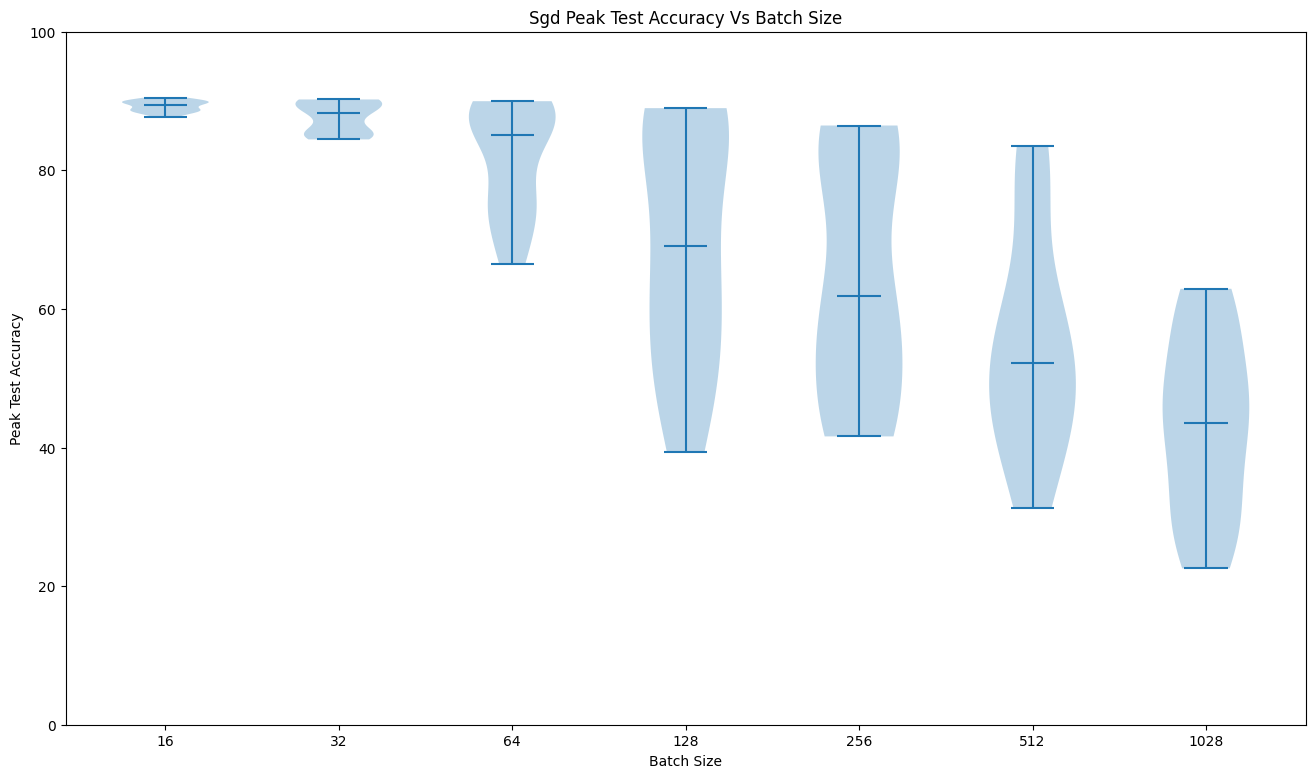

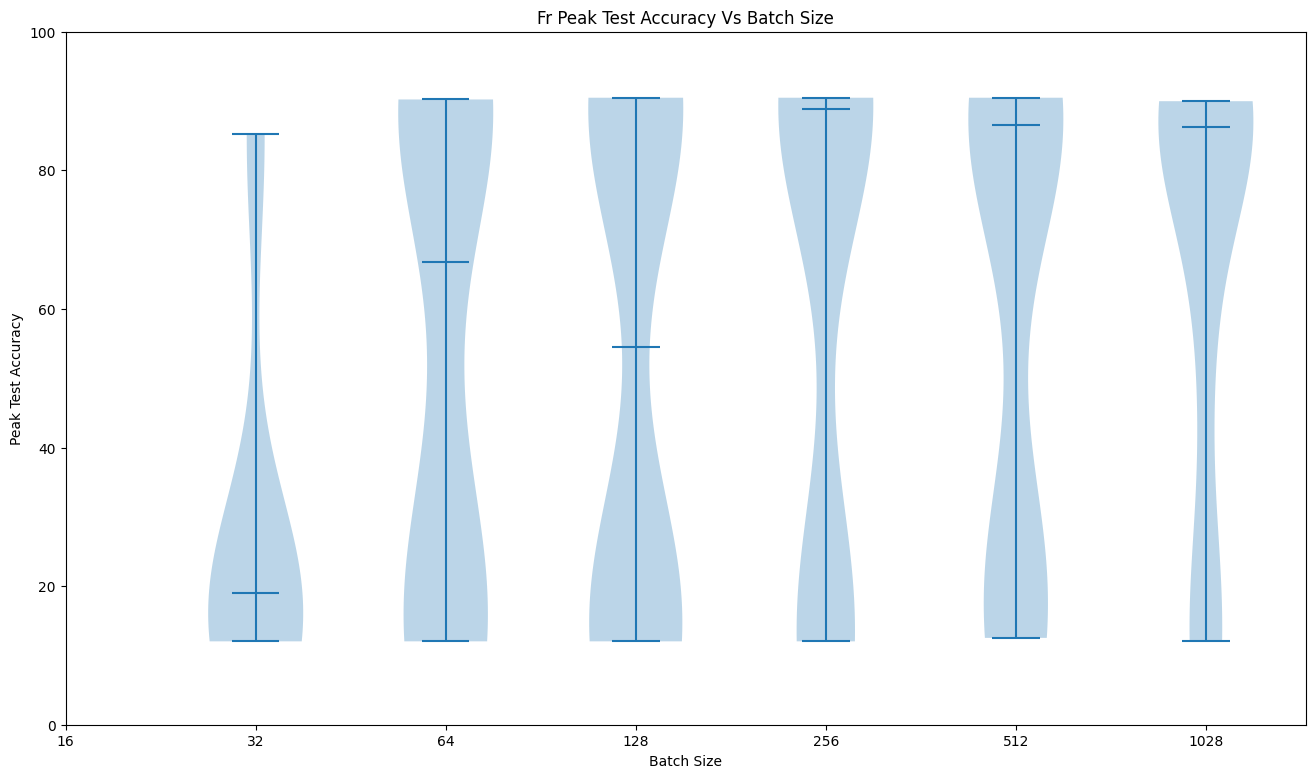

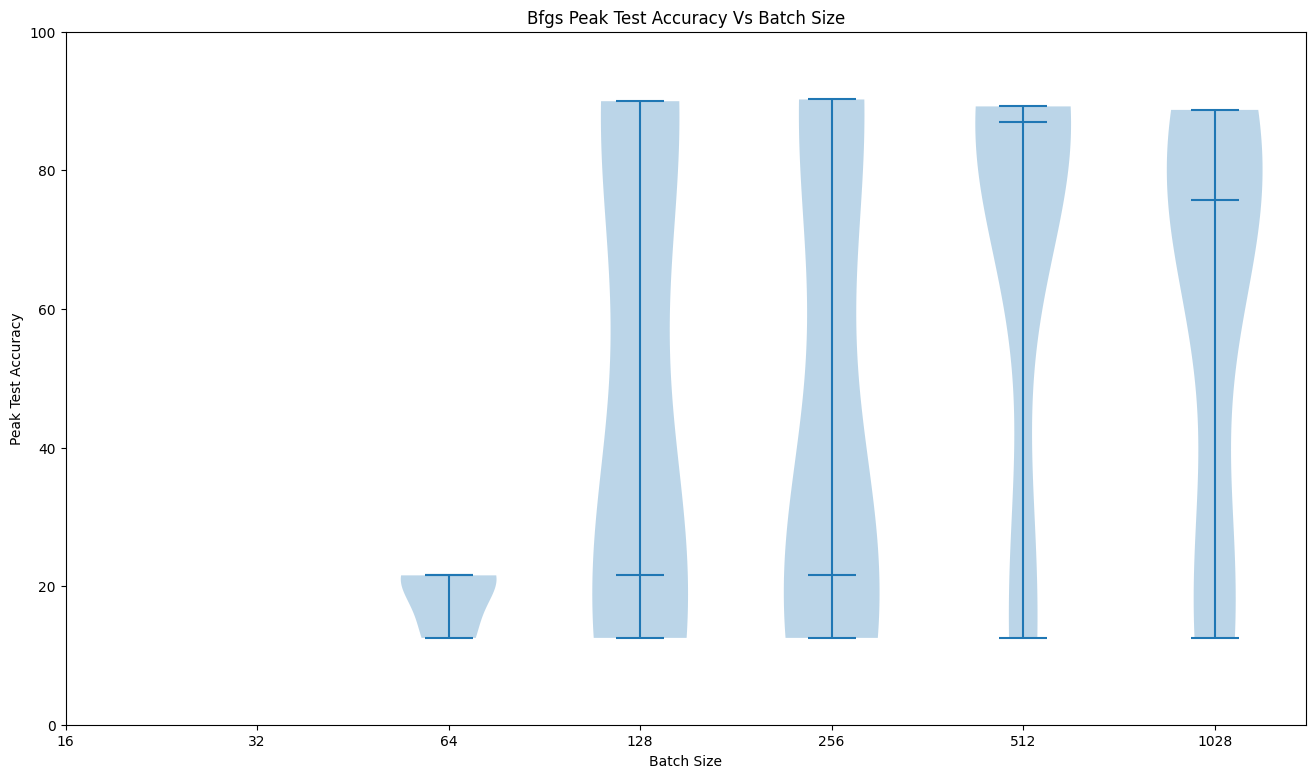

In [40]:
def plot_rows(df: pd.DataFrame, best_column: str, opt_name: str, save=False, time=True, epoch=True, random=False):
    save_args = dict(facecolor="white", transparent=False)
    top_or_rand_str = "top"
    if random:
        top_or_rand_str = "random"

    plt.figure(figsize=(16,9))
    if epoch:
        for row in df.itertuples():
            plt.plot(row.test_accuracy_list)
        plt.xlabel("Epoch")
        plt.ylabel("Percent correct")
        plt.ylim((0, 100.0))
        title = f"{opt_name}, {top_or_rand_str.capitalize()} {len(df.index)} runs by {best_column}, Accuracy vs. Epoch"
        plt.title(title)
        if save:
            save_name = f"{opt_name}_{top_or_rand_str}_{len(df.index)}_{best_column}_acc_vs_epoch.png"
        plt.savefig(IMG_OUTPUT_DIR / save_name, **save_args)

    if time:
        plt.figure(figsize=(16,9))
        for row in df.itertuples():
            plt.plot(row.training_timestamps, row.test_accuracy_list)
        plt.xlabel("Time (s)")
        plt.ylabel("Percent correct")
        plt.ylim((0, 100.0))
        title = f"{opt_name}, {top_or_rand_str.capitalize()} {len(df.index)} runs by {best_column}, Accuracy vs. Time"
        plt.title(title)
        if save:
            save_name = f"{opt_name}_{top_or_rand_str}_{len(df.index)}_{best_column}_acc_vs_time.png"
            plt.savefig(IMG_OUTPUT_DIR / save_name, **save_args)

    if epoch:
        plt.figure(figsize=(16,9))
        for row in df.itertuples():
            plt.plot(row.train_loss_list)
        plt.xlabel("Epoch")
        plt.ylabel("Training Loss, Log")
        plt.yscale("log")
        title = f"{opt_name}, {top_or_rand_str.capitalize()} {len(df.index)} runs by {best_column}, Training Loss vs. Epoch"
        plt.title(title)
        if save:
            save_name = f"{opt_name}_{top_or_rand_str}_{len(df.index)}_{best_column}_train_loss_vs_epoch.png"
            plt.savefig(IMG_OUTPUT_DIR / save_name, **save_args)

        plt.figure(figsize=(16,9))
        for row in df.itertuples():
            plt.plot(row.test_loss_list)
        plt.xlabel("Epoch")
        plt.ylabel("Test Loss, Log")
        plt.yscale("log")
        title = f"{opt_name}, {top_or_rand_str.capitalize()} {len(df.index)} runs by {best_column}, Test Loss vs. Epoch"
        plt.title(title)
        if save:
            save_name = f"{opt_name}_{top_or_rand_str}_{len(df.index)}_{best_column}_test_loss_vs_epoch.png"
            plt.savefig(IMG_OUTPUT_DIR / save_name, **save_args)


def plot_performance_vs_batch_size(df: pd.DataFrame, opt_name: str, peak: bool, violin: bool=False):
    # batch_sizes = [100, 1000, 5000, 10000, 25000, 50000]
    batch_sizes = [16,32,64,128,256,512,1028] # 1028 is commented out since it adds an extra label and ruins dimensions. It will be added back in once we solve VRAM issue to actually get the datga for batch size 1028 and beyond maybe
    opt_df = df.loc[df["specs.opt"] == opt_name]
    fig = plt.figure(figsize=(16, 9))
    if peak:
        acc = opt_df["top_test_acc"]
        ylabel = "Peak Test Accuracy"
    else:
        acc = opt_df["final_test_acc"]
        ylabel = "Final Test Accuracy"

    x_axis = opt_df["specs.batch_size_train"]

    if violin:
        tmp_df = pd.concat([x_axis, acc], axis=1, keys=["hparam", "acc"])
        hparams = list(set(x_axis))
        if len(hparams) == 0:
            print(f"No data for optimizer {opt_name}!")
            return
        hparams.sort()
        def get_hparam_match_and_count(hparam_):
            tmp = tmp_df.loc[tmp_df["hparam"] == hparam_]["acc"]
            if len(tmp) == 0:
                return pd.Series(np.zeros(2)*np.nan), 0
            return tmp, len(tmp)
        data_and_counts = [get_hparam_match_and_count(i) for i in batch_sizes]
        data = [i[0] for i in data_and_counts]
        counts = [i[1] for i in data_and_counts]
        hparam_strs = [f"{h}\nN={c}" for h, c in zip(batch_sizes, counts)]
        xticklabels = hparam_strs
        xticks = [*range(1,8)]

        ax = fig.add_subplot(111)
        ax.violinplot(data, showmedians=True)
        ax.set_xticks(xticks)
        ax.set_xticklabels([16,32,64,128,256,512,1028])
    else:
        plt.scatter(x_axis, acc)

    plt.xlabel("Batch Size")
    plt.ylabel(ylabel)
    plt.ylim((0.0, 100.0))
    name = f"{opt_name}_{ylabel}_vs_batch_size".replace(" ", "_")
    name = name.replace("specs.", "")
    plot_title = name.split("_")
    plot_title[0] = plot_title[0].upper()

    plt.title(" ".join(plot_title).title())
    plt.savefig(IMG_OUTPUT_DIR / (name + ".png"), facecolor="white", transparent=False)

for optim in OPT_OF_INTEREST:
    plot_performance_vs_batch_size(cifar, optim, True, violin=True)

In [26]:
def plot_optimizer_of_interest(df: pd.DataFrame, opt_name: str, to_plot: int, time=True, epoch=True, random=False) -> None:
    opt_df = df.loc[df["specs.opt"] == opt_name]
    if random:
        to_plot = get_n_random(opt_df, to_plot)
    else:
        to_plot = get_n_best_acc(opt_df, to_plot)
    A = "top_test_acc"
    B = "final_test_acc"
    plot_rows(to_plot, A, opt_name, save=True, time=time, epoch=epoch, random=random)
    #plot_rows(best_final_val, B, opt_name, save=True)

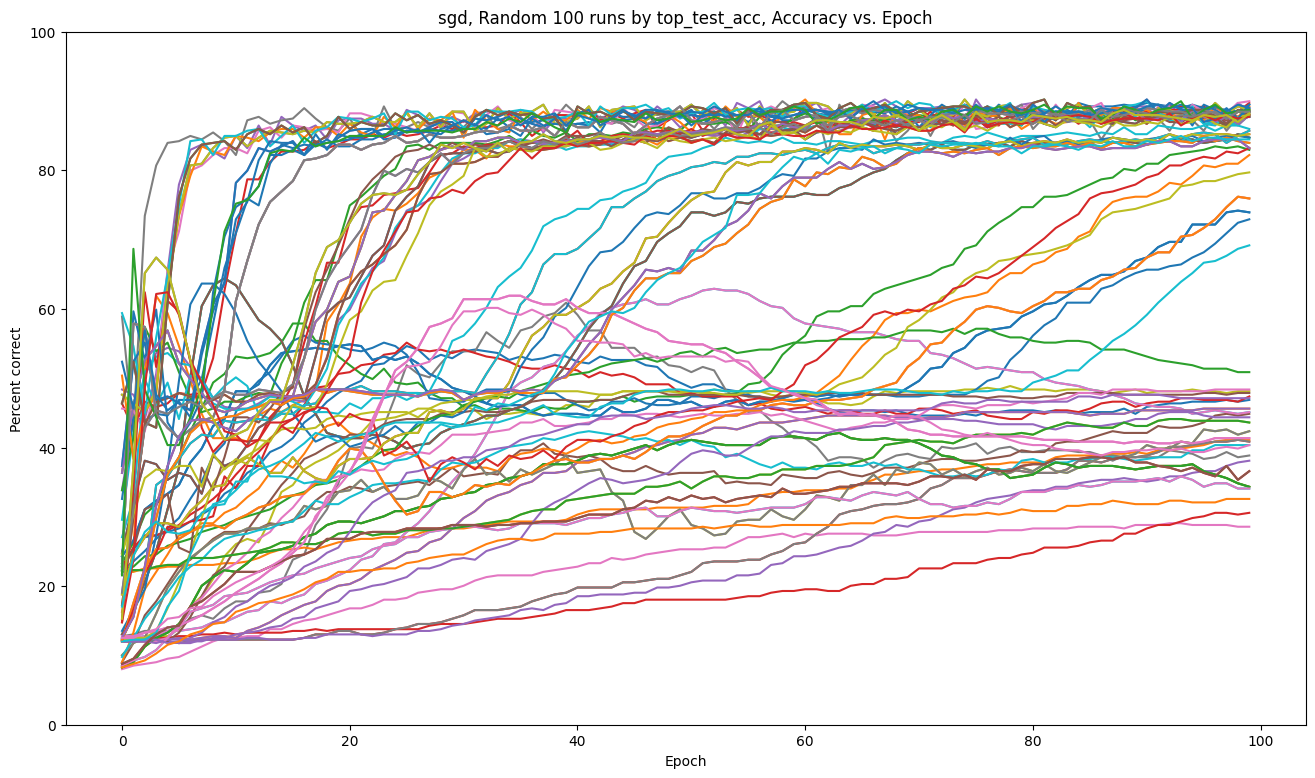

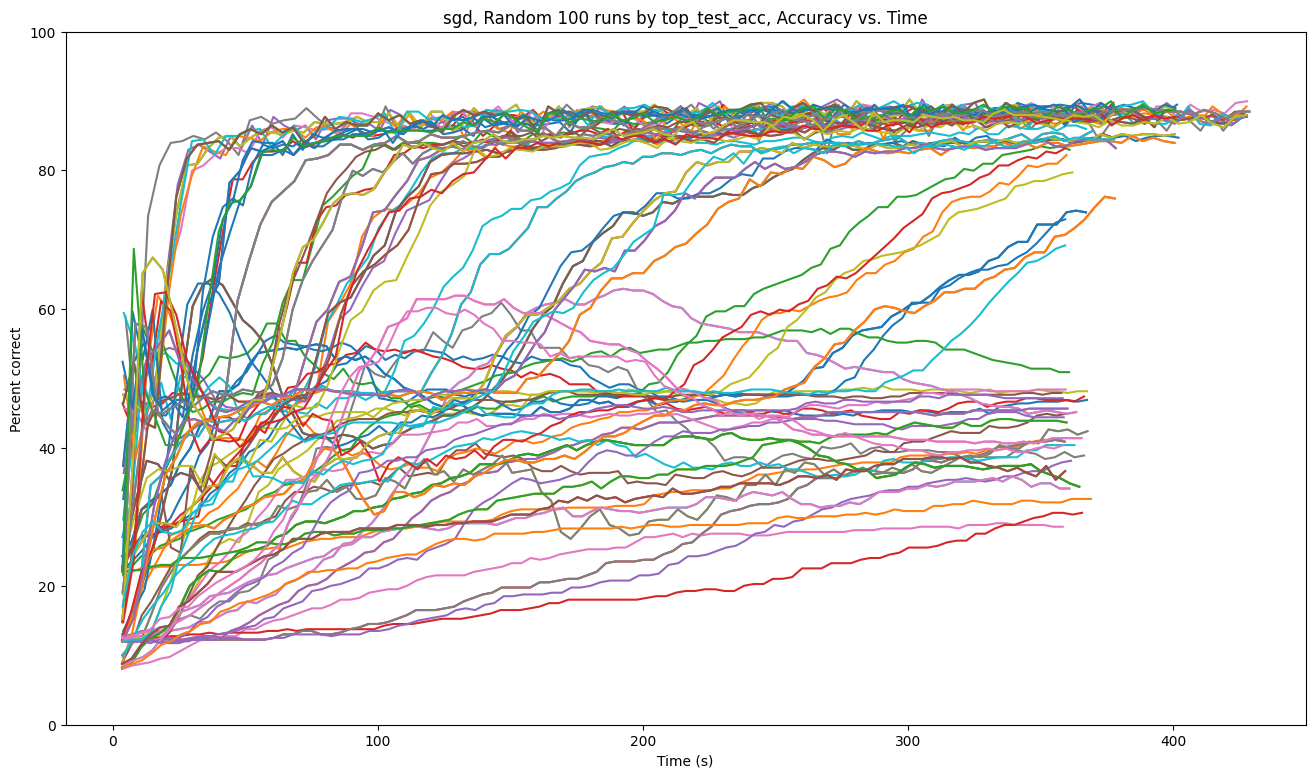

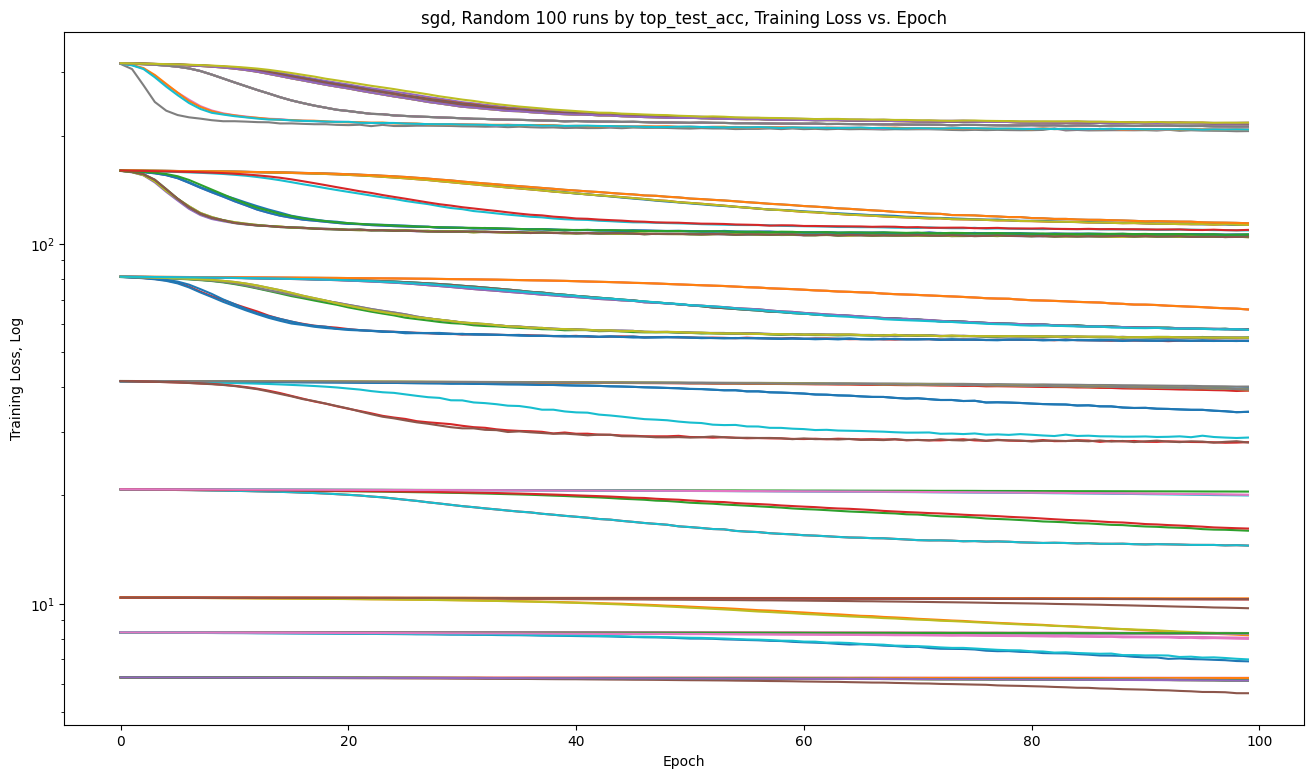

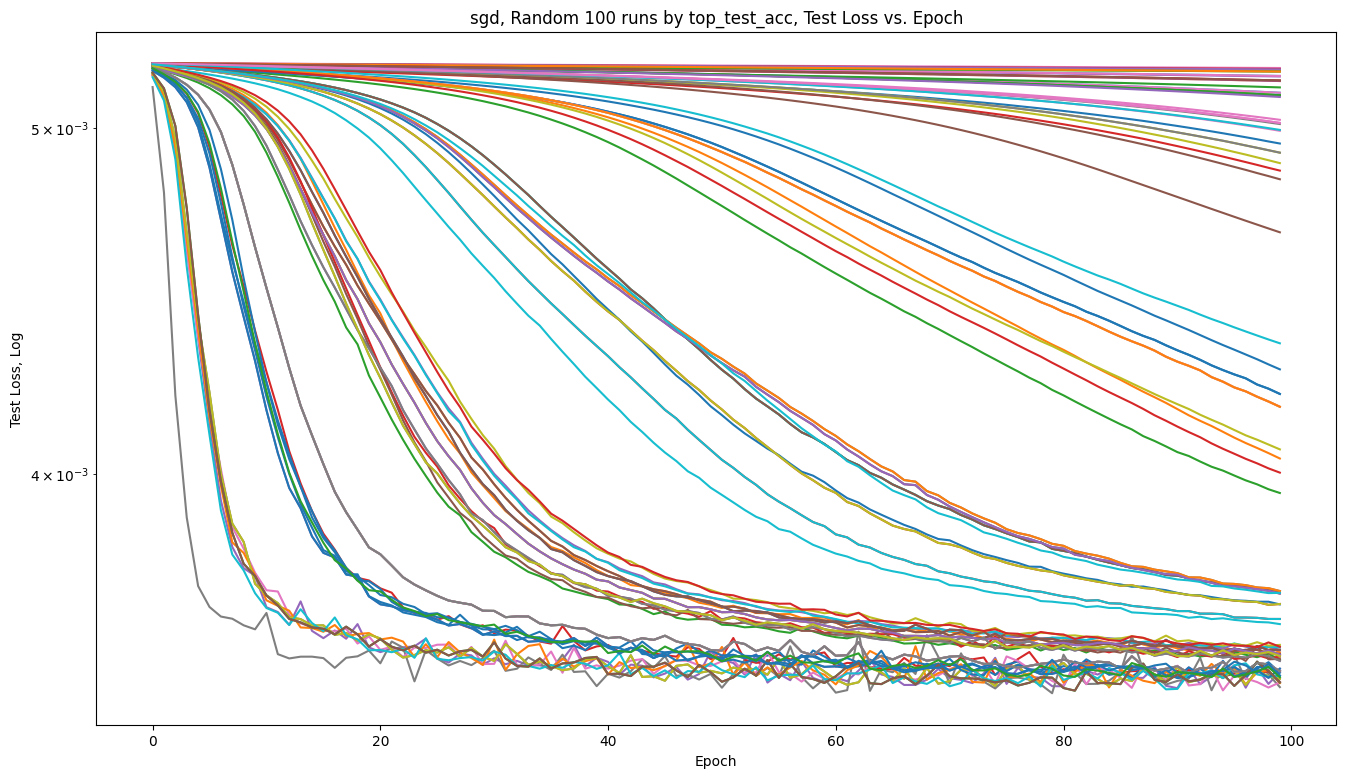

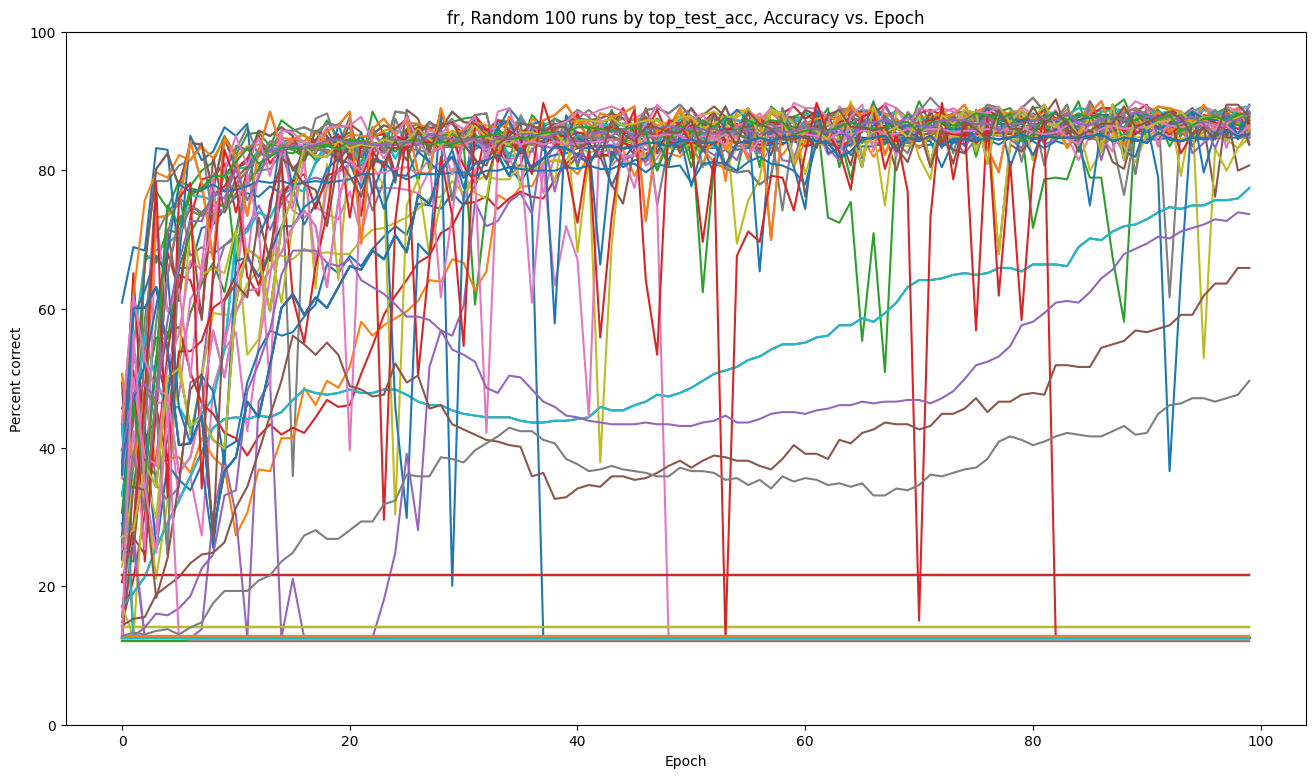

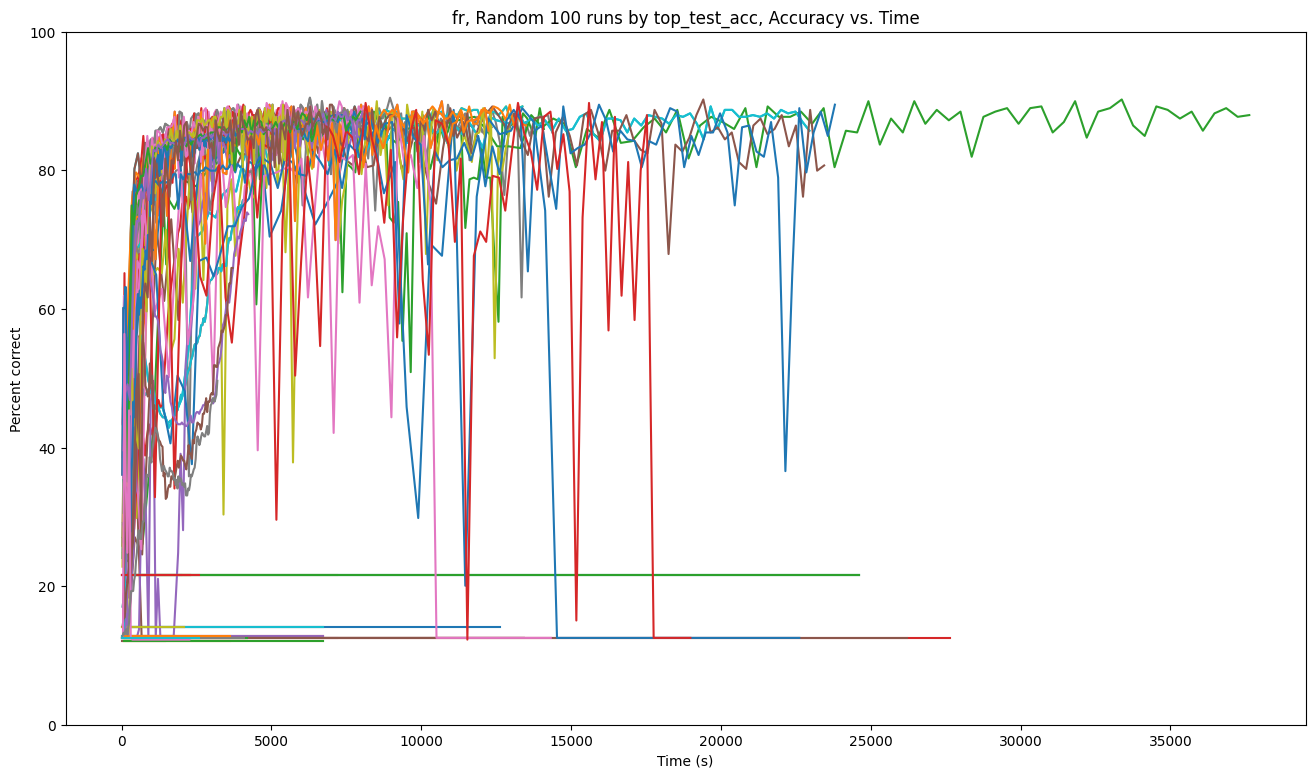

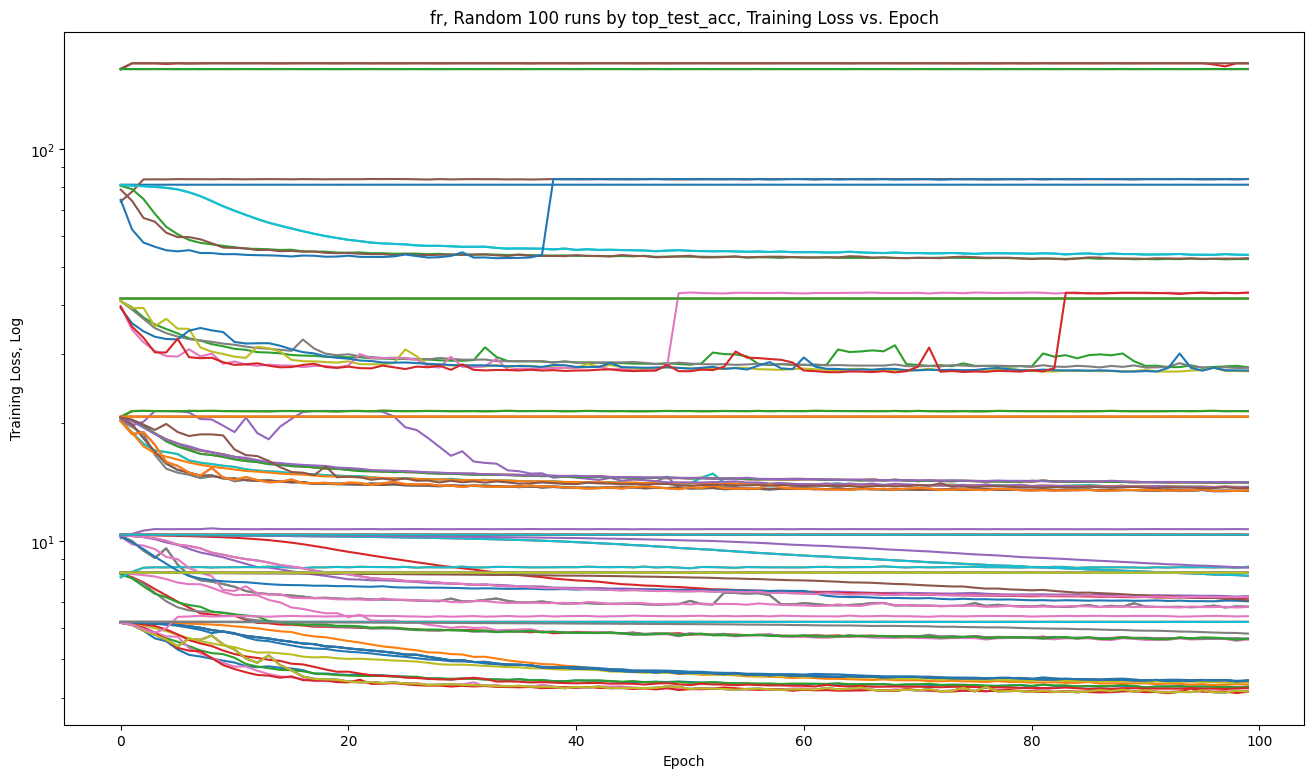

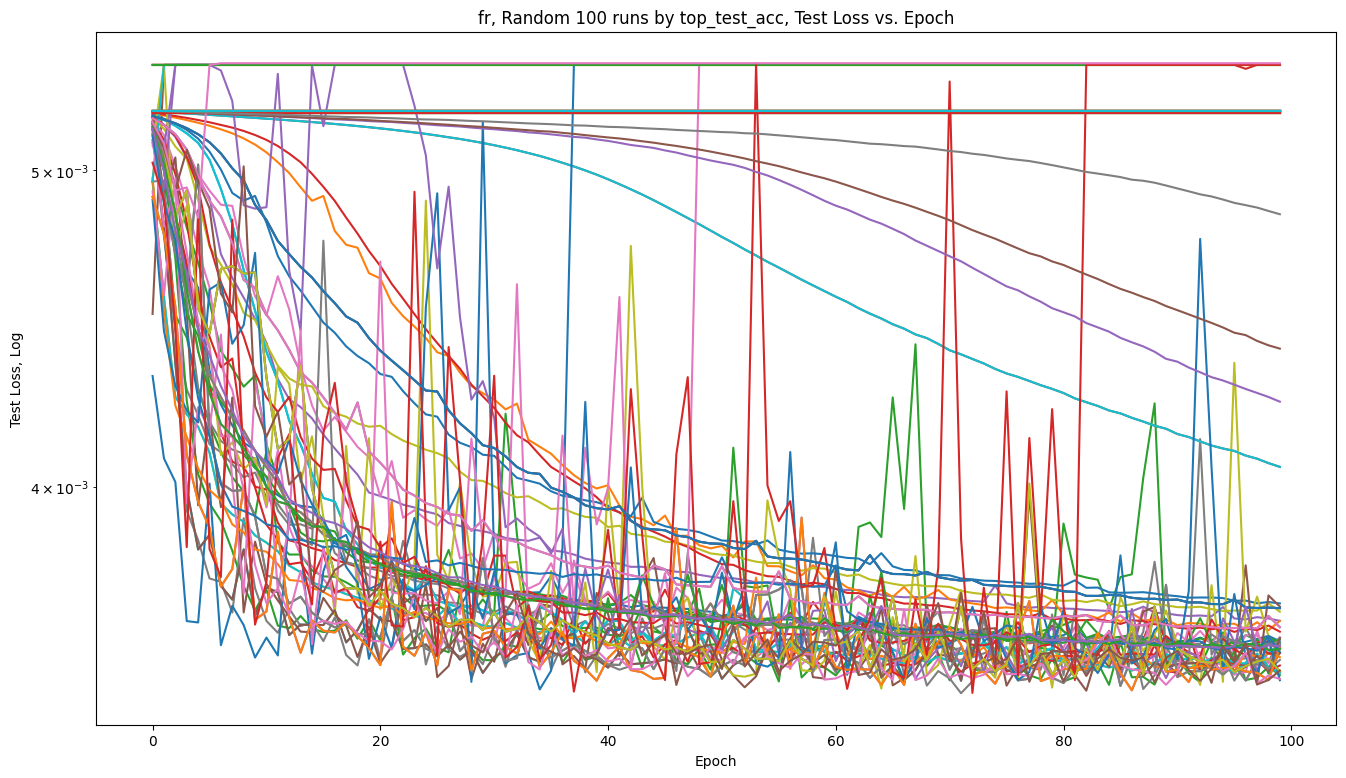

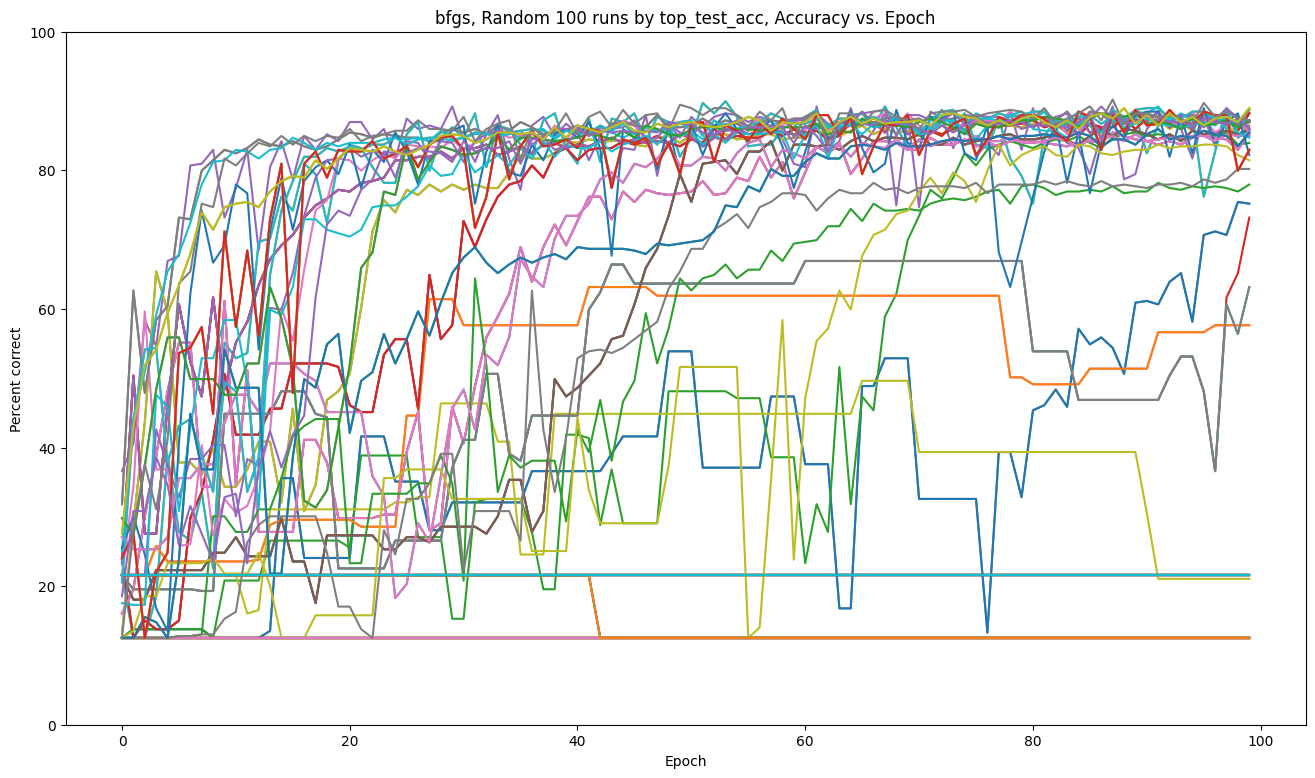

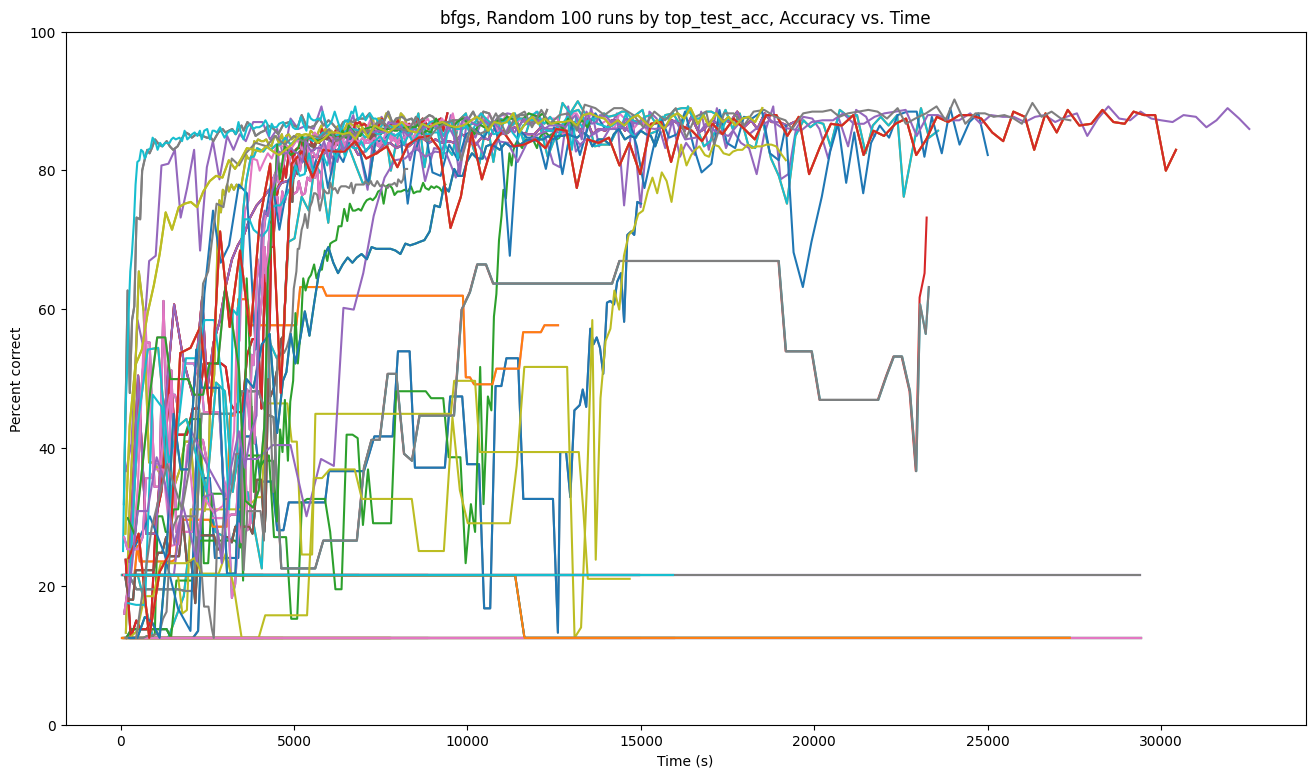

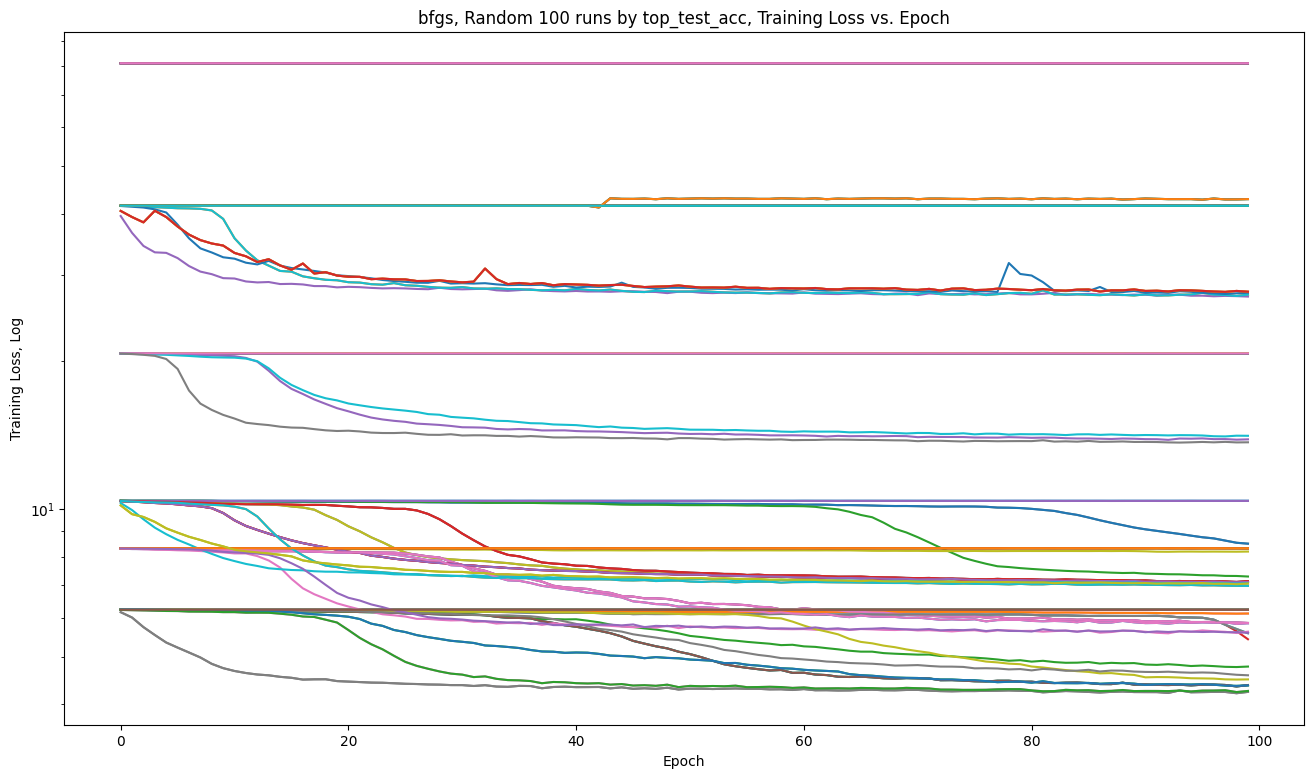

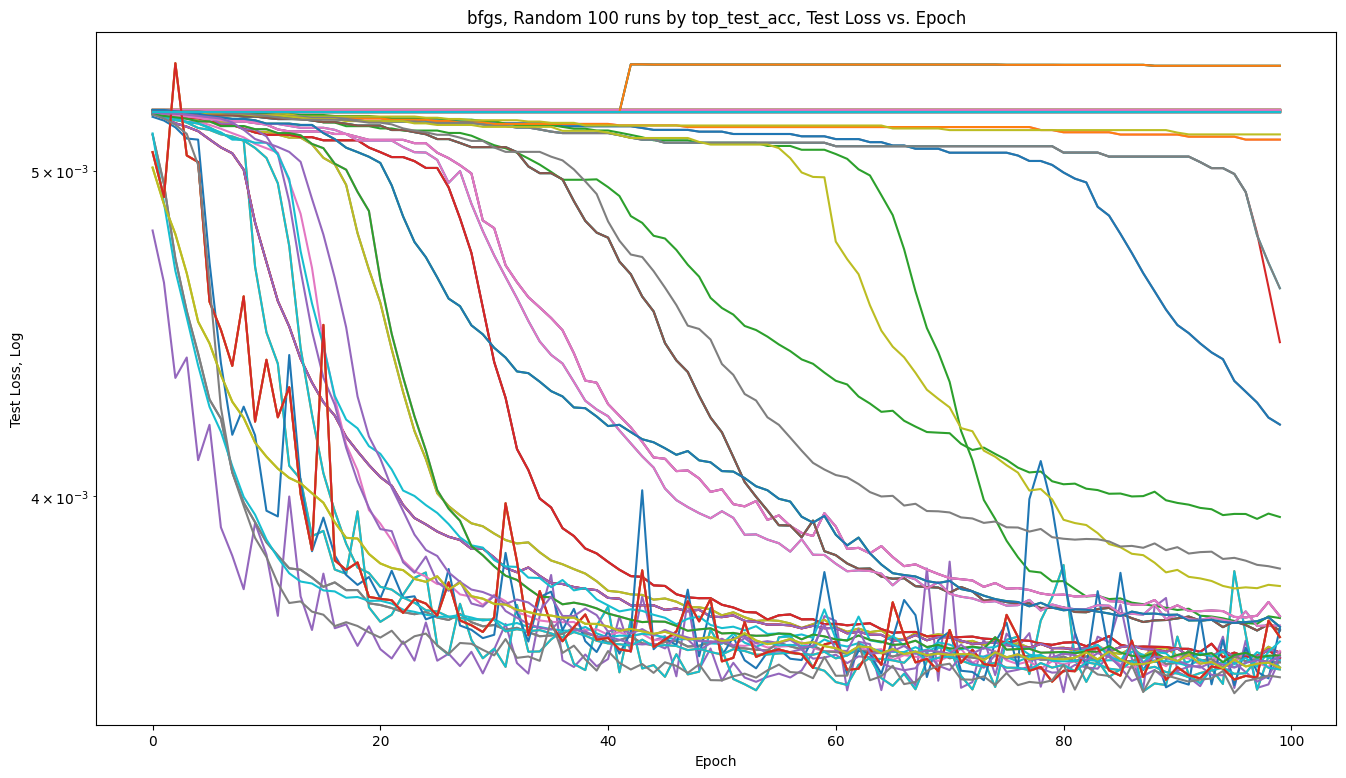

In [27]:
for opt in OPT_OF_INTEREST:
    plot_optimizer_of_interest(cifar, opt, 100, epoch=True, random=True)

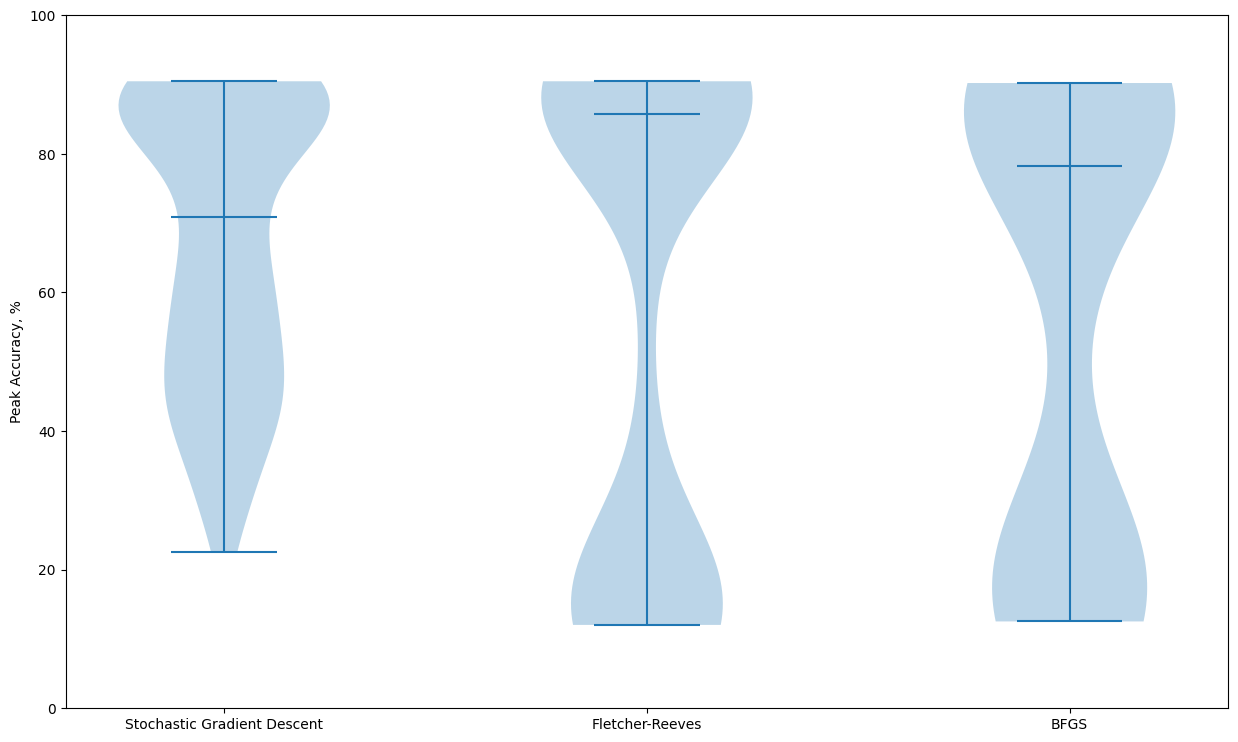

In [28]:
def violin_opt_comparison(
    full_df: pd.DataFrame,
    opts_of_interest: Iterable[str],
    save: bool=True,
) -> None:
    dataframes = []
    for opt_name in opts_of_interest:
        acc_series = full_df.loc[full_df["specs.opt"] == opt_name]["top_test_acc"]
        tmp_df = acc_series.to_frame(name=NAME_DICT[opt_name])
        tmp_df.reset_index(inplace=True)
        tmp_df.drop("index", inplace=True, axis=1)
        dataframes.append(tmp_df)

    labels = [i.columns[0] for i in dataframes]
    dataset = [i[i.columns[0]] for i in dataframes]
    plt.figure(figsize=(15, 9))
    plt.violinplot(dataset, showextrema=True, showmedians=True)
    plt.xticks([*range(1, len(dataset)+1)], labels=labels)
    plt.ylim((0.0, 100.0))
    plt.ylabel("Optimizer")
    plt.ylabel("Peak Accuracy, %")
    plt.show()

violin_opt_comparison(cifar, OPT_OF_INTEREST)

In [29]:
def violin_plot_peak_acc(
    df: pd.DataFrame,
    opt_name: str,
    discriminate_fgd: bool=False,
    save=True
) -> None:
    nrows = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(16,9), squeeze=False)
    axes[0, 0].set_ylim(bottom=0.0, top=100.0)
    if discriminate_fgd and opt_name == "sgd":
        opt_df = df.loc[df["specs.opt"] == opt_name]
        opt_df = opt_df.append(df.loc[df["specs.opt"] == "fgd"], ignore_index=True)
    else:
        opt_df = df.loc[df["specs.opt"] == opt_name]
    #opt_df = get_summary_vals(opt_df)

    # Peak accuracy
    peak_acc = opt_df["top_test_acc"]
    axes[0, 0].violinplot(peak_acc, showextrema=True, showmedians=True)
    axes[0, 0].set_title(f"Distribution of Peak Testing Accuracy: {opt_name}")

    # Peak Accuracy Table
    acc_summary = pd.DataFrame(peak_acc.describe())
    acc_summary.rename(columns={"top_test_acc": "Peak Test Accuracy"}, inplace=True)


    if save:
        plt.savefig(IMG_OUTPUT_DIR / f"{opt}_peak_accuracy_violin.png")
    plt.show()

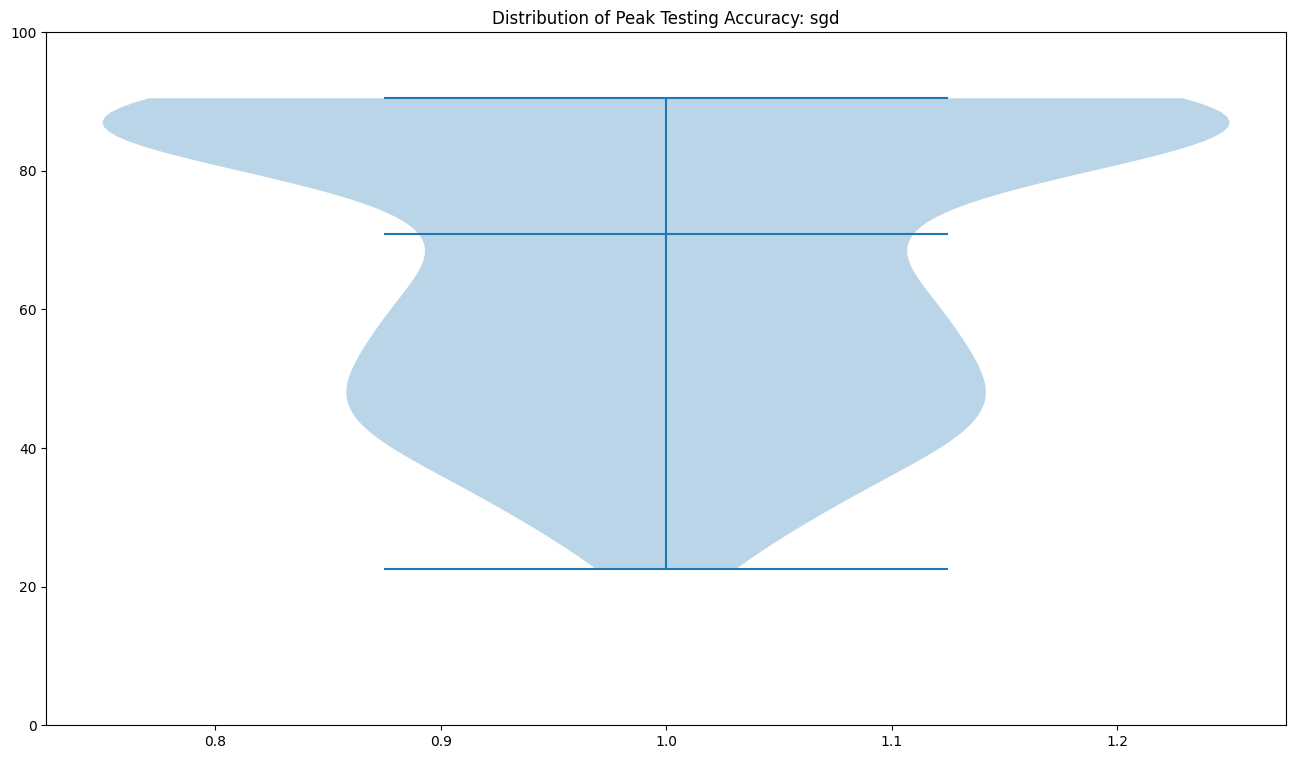

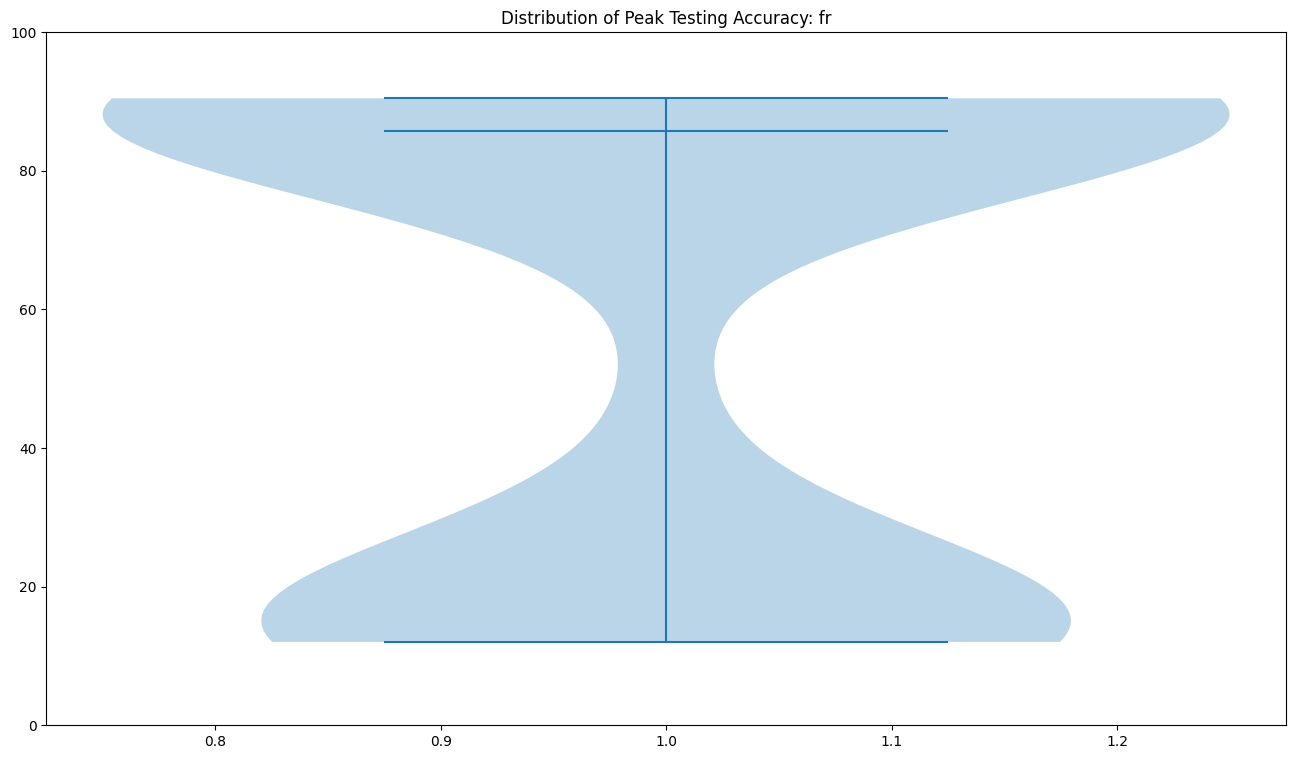

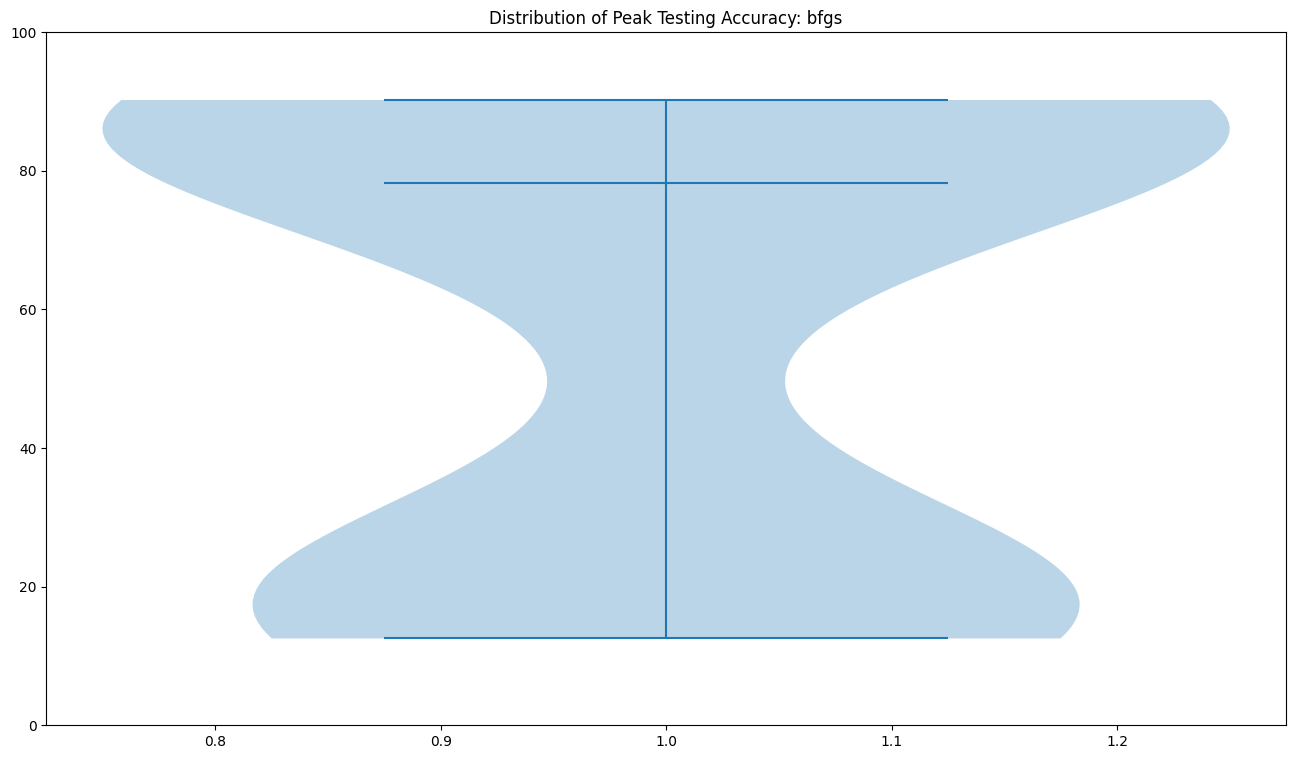

In [30]:
for opt in OPT_OF_INTEREST:
    violin_plot_peak_acc(cifar, opt, save=True)

    top_test_acc  time_to_peak_acc
0      66.416040      19038.693393
0      85.714286      15363.751645
0      88.471178      21143.794195
0      62.656642       9424.165221
0      88.972431      15602.153908
..           ...               ...
0      84.962406      18641.652524
0      43.107769      18240.531511
0      89.223058      12044.226019
0      61.152882      14359.848955
0      56.390977       3935.737466

[160 rows x 2 columns]


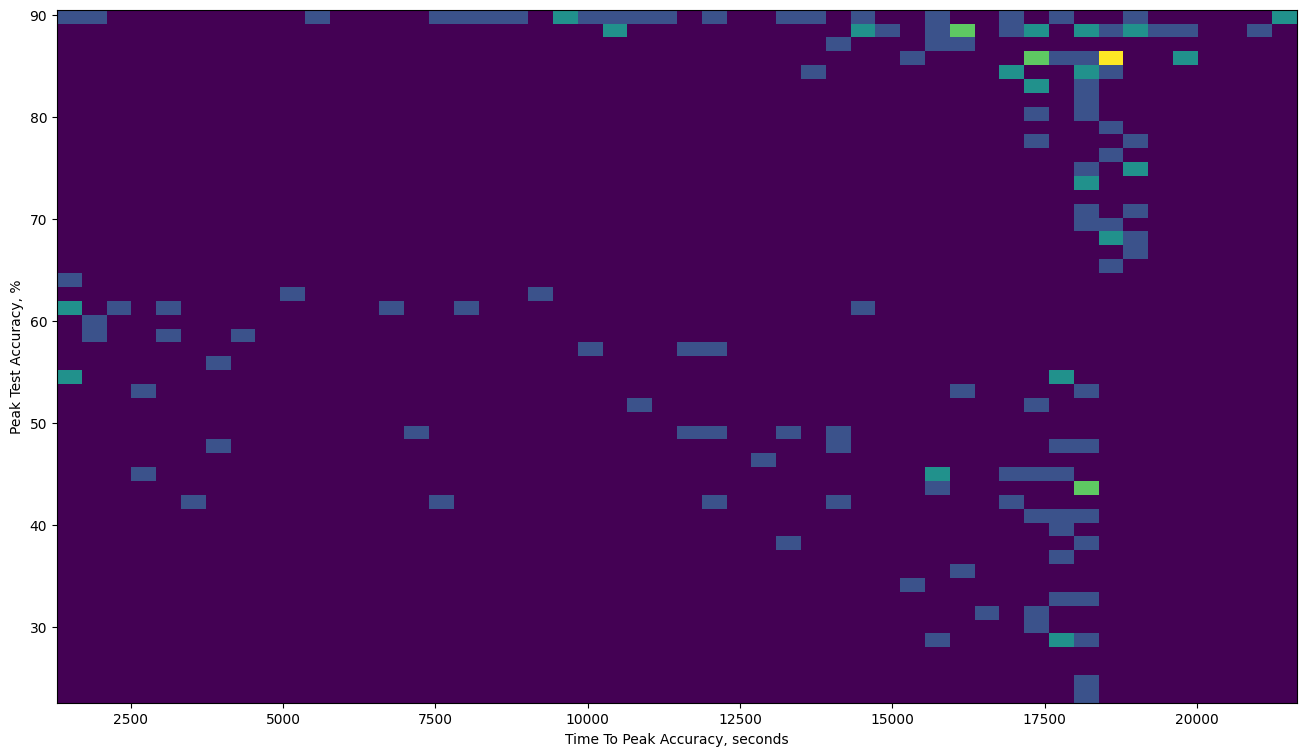

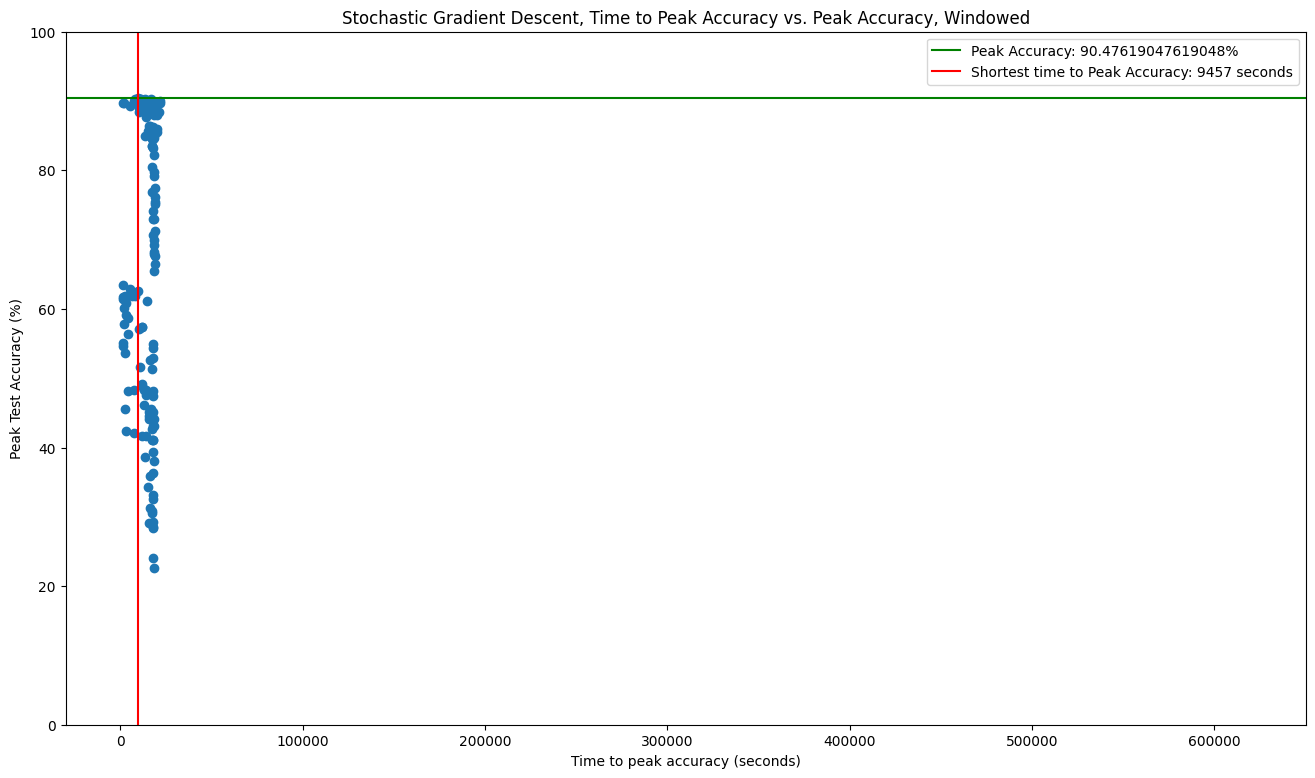

    top_test_acc  time_to_peak_acc
0      12.531328         19.726170
0      88.972431     164486.394946
0      12.030075        241.787393
0      86.716792     136706.916976
0      88.721805     275733.340254
..           ...               ...
0      87.969925     223938.622968
0      89.974937      83569.133184
0      88.220551     280538.648971
0      88.721805     406440.418140
0      77.443609     210154.552851

[207 rows x 2 columns]


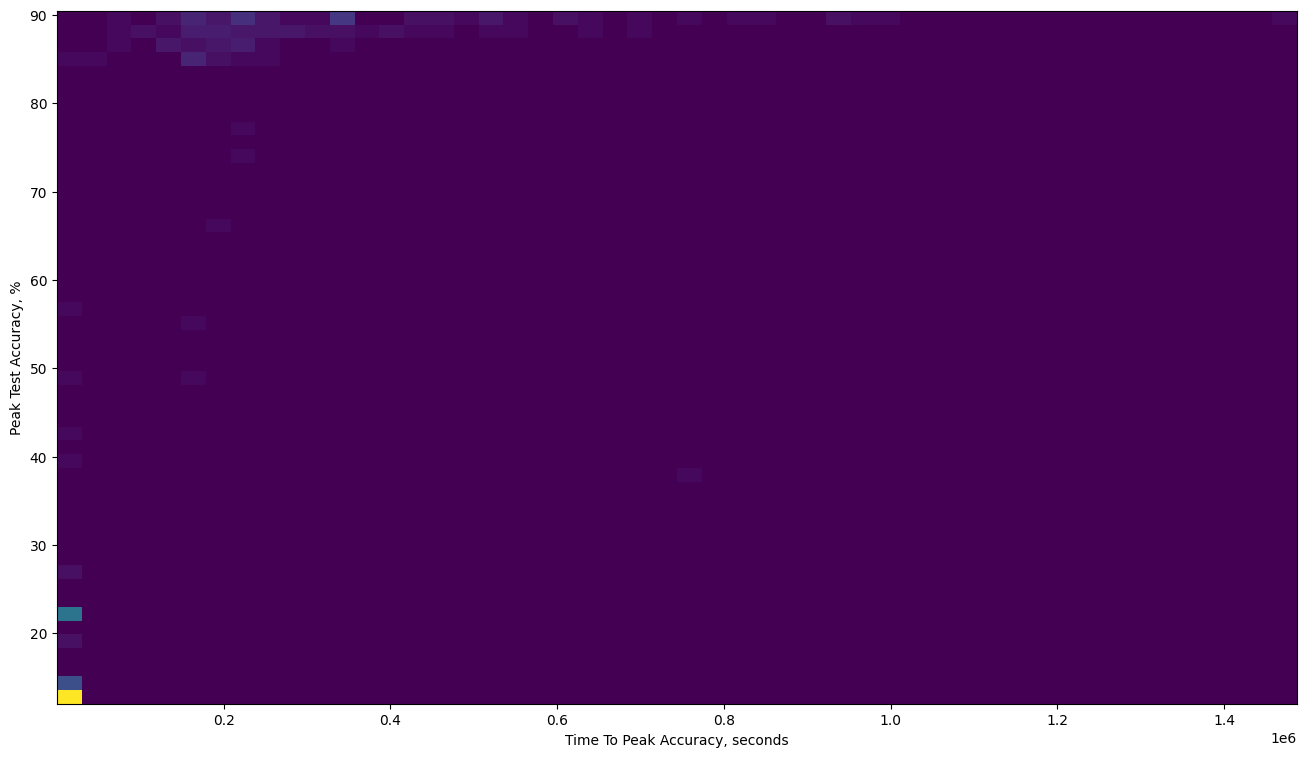

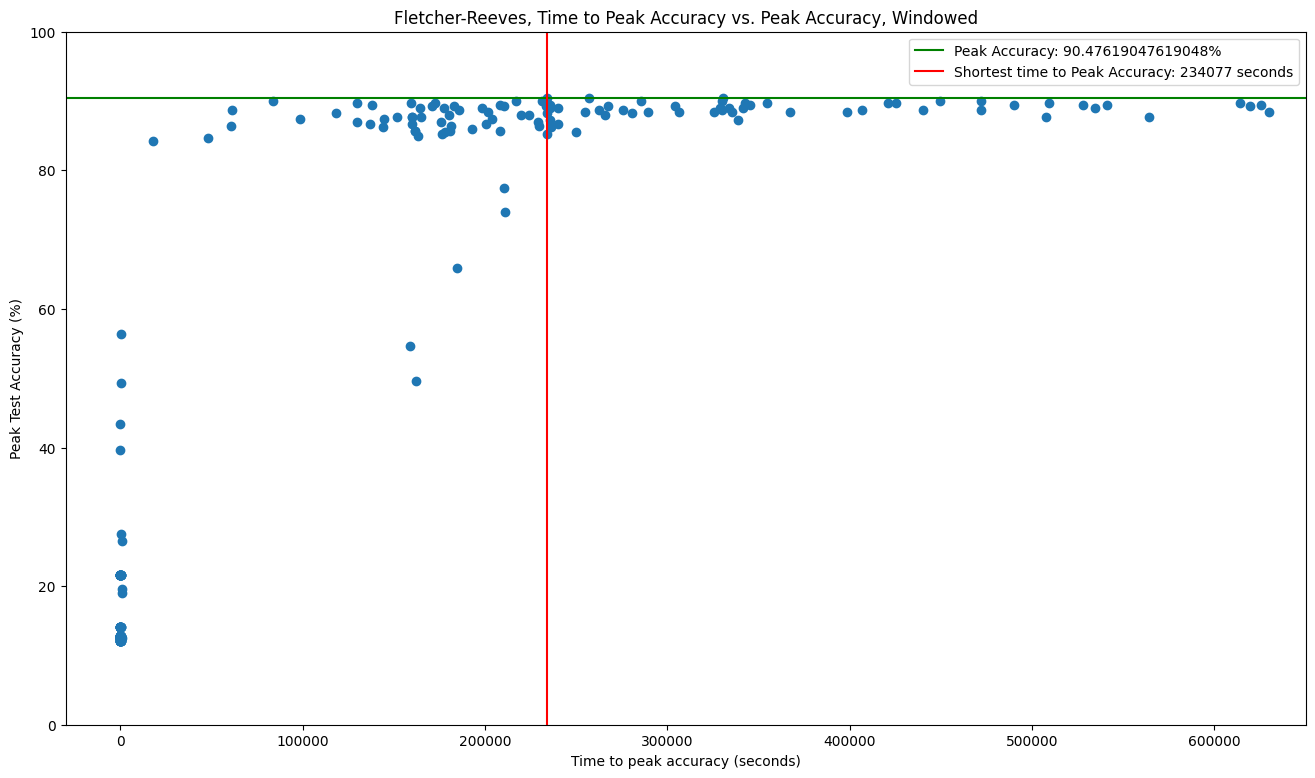

    top_test_acc  time_to_peak_acc
0      83.709273      6.959600e+05
0      85.964912      3.595547e+05
0      66.917293      4.432110e+05
0      12.531328      9.157825e+01
0      86.967419      1.267066e+06
..           ...               ...
0      21.553885      6.838198e+01
0      21.553885      4.142658e+01
0      21.553885      1.524856e+02
0      86.215539      9.954141e+05
0      89.974937      4.078198e+05

[61 rows x 2 columns]


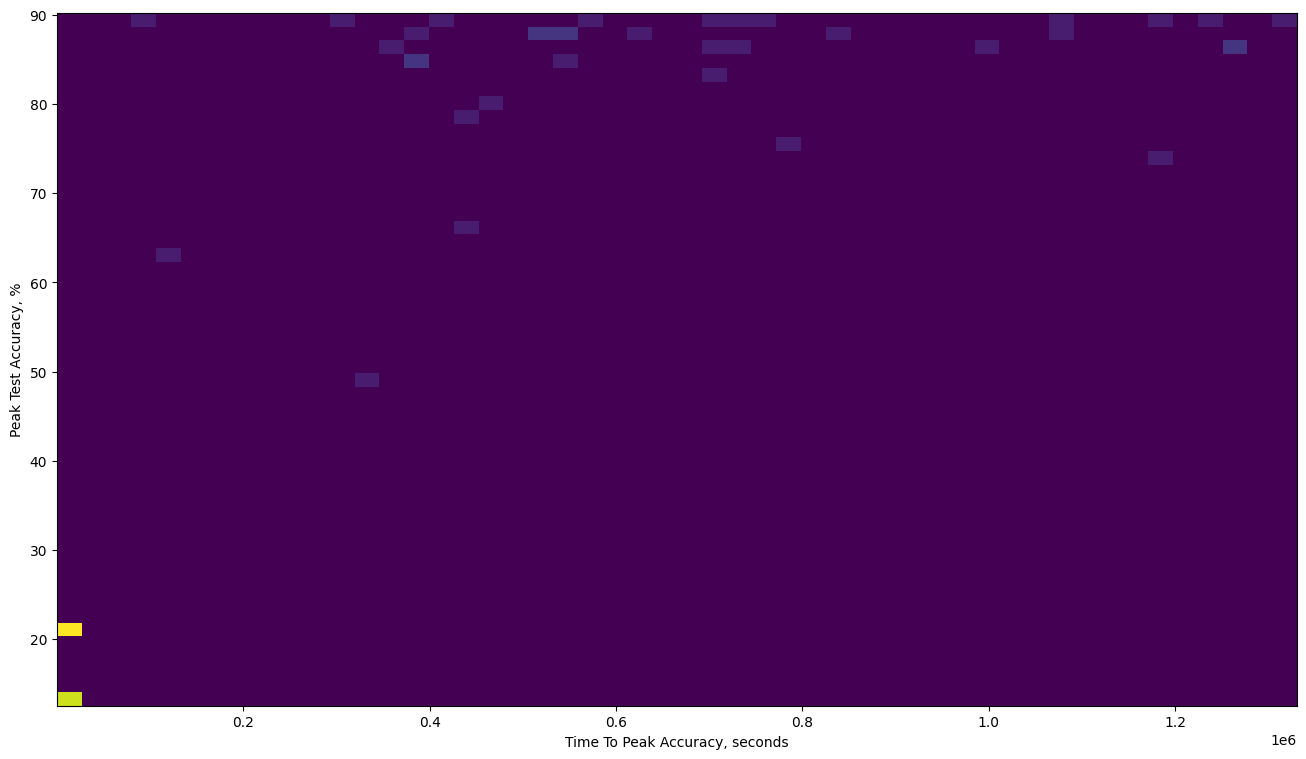

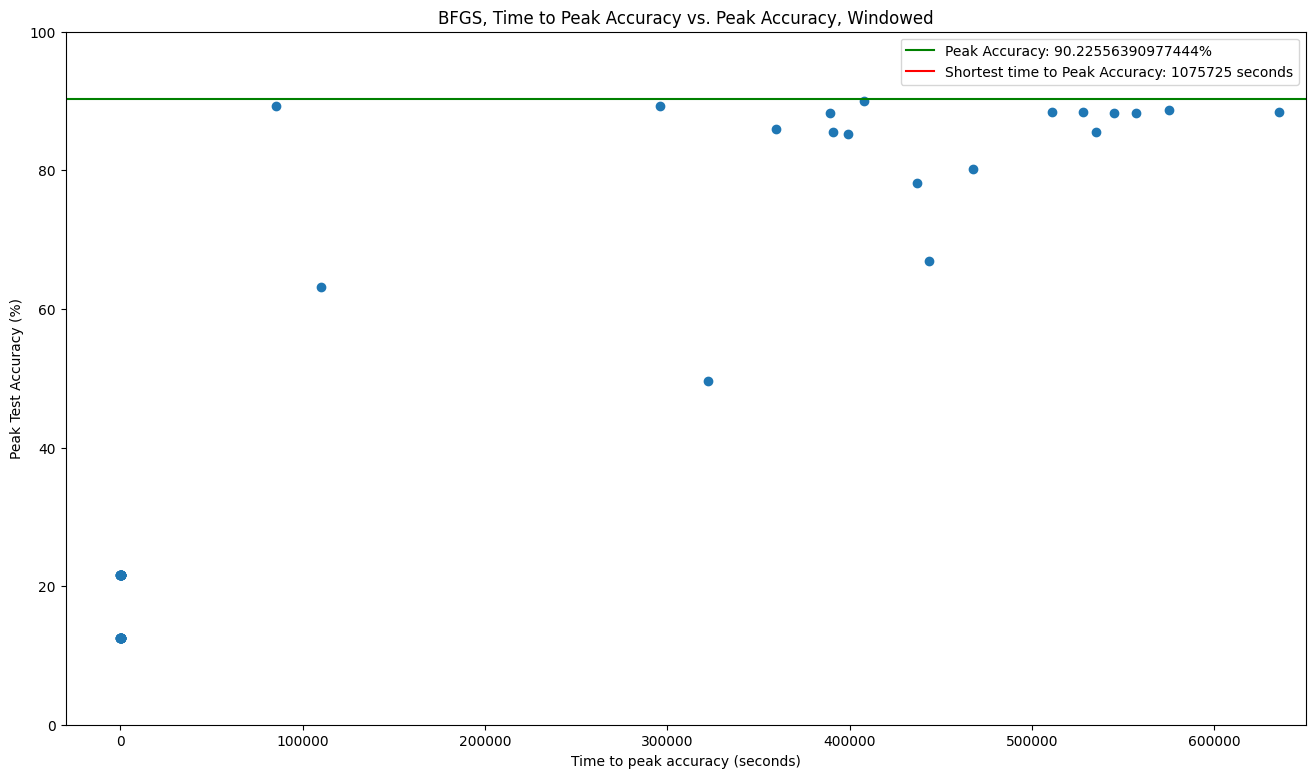

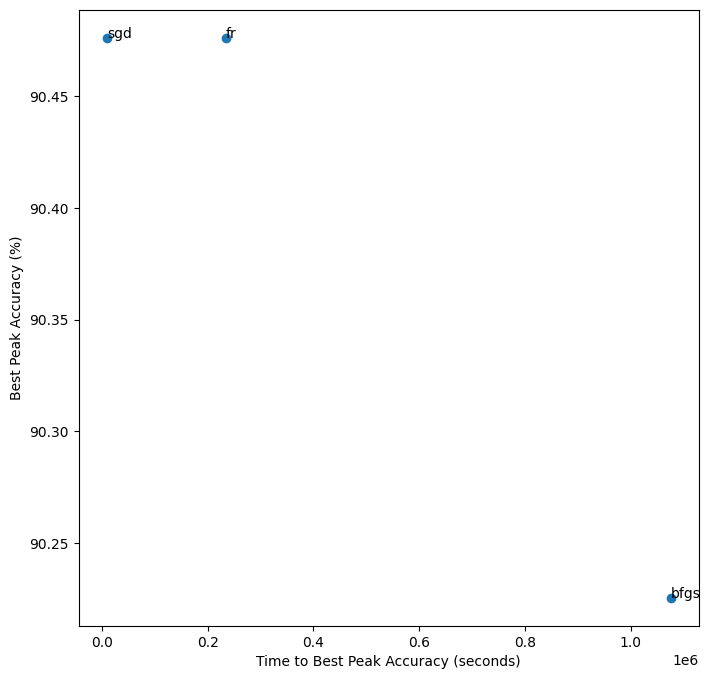

In [31]:
def time_to_peak_vs_peak_acc(df: pd.DataFrame, opt_name: str, plot_full: bool=False, hist: bool=True):
    opt_df = df.loc[df["specs.opt"] == opt_name][["top_test_acc", "time_to_peak_acc"]]
    opt_df[opt_df["time_to_peak_acc"] == np.inf] = np.nan
    print(opt_df)

    opt_df = opt_df.dropna()

    peak = max(opt_df["top_test_acc"])
    peak_acc_row = opt_df.loc[opt_df["top_test_acc"] == peak]
    time_of_shortest_peak = min(peak_acc_row["time_to_peak_acc"].values)
    time_to_peak_acc = deepcopy(opt_df["time_to_peak_acc"])
    top_test_acc = deepcopy(opt_df["top_test_acc"])

    time_to_peak_acc[time_to_peak_acc == np.inf] = np.nan

    if plot_full:
        plt.figure(figsize=(16, 9))
        plt.scatter(time_to_peak_acc, top_test_acc)
        plt.ylim((0, 100))
        plt.title(f"{NAME_DICT[opt_name]}, Time to Peak Accuracy vs. Peak Accuracy")
        plt.axhline(y=peak, color='g', linestyle="-", label=f"Peak Accuracy: {peak}%")
        plt.axvline(x=time_of_shortest_peak, color="r", linestyle="-", label=f"Shortest time to Peak Accuracy: {time_of_shortest_peak:.0f} seconds")
        plt.xlabel("Time to peak accuracy (seconds)")
        plt.ylabel("Peak Test Accuracy (%)")
        plt.legend()

    if hist:
        plt.figure(figsize=(16,9))
        plt.hist2d(time_to_peak_acc, top_test_acc, bins=50)
        plt.ylabel("Peak Test Accuracy, %")
        plt.xlabel("Time To Peak Accuracy, seconds")


    plt.figure(figsize=(16, 9))
    plt.ylim((0, 100))
    plt.scatter(time_to_peak_acc, top_test_acc)
    plt.xlim((-30000, 650000))
    plt.title(f"{NAME_DICT[opt_name]}, Time to Peak Accuracy vs. Peak Accuracy, Windowed")
    plt.axhline(y=peak, color='g', linestyle="-", label=f"Peak Accuracy: {peak}%")
    plt.axvline(x=time_of_shortest_peak, color="r", linestyle="-", label=f"Shortest time to Peak Accuracy: {time_of_shortest_peak:.0f} seconds")
    plt.xlabel("Time to peak accuracy (seconds)")
    plt.ylabel("Peak Test Accuracy (%)")
    plt.legend()
    plt.show()

    return time_of_shortest_peak, peak

def plot_solution_space(solution_space):
    opts = [i[0] for i in solution_space]
    ts = [i[1] for i in solution_space]
    ps = [i[2] for i in solution_space]

    plt.figure(figsize=(8,8))
    plt.scatter(ts, ps)
    for i, opt in enumerate(opts):
        plt.annotate(opt, (ts[i], ps[i]))

    plt.xlabel("Time to Best Peak Accuracy (seconds)")
    plt.ylabel("Best Peak Accuracy (%)")

solution_space = []
for opt in OPT_OF_INTEREST:
    t, p = time_to_peak_vs_peak_acc(cifar, opt)
    solution_space.append((opt, t, p))

plot_solution_space(solution_space)


In [32]:
from scipy.stats import f_oneway, kruskal, alexandergovern

def conduct_test_intra_optimizer(df: pd.DataFrame, opt_name: str, test: Callable, batch_sizes: Optional[List[int]]=None):
    opt_df = df.loc[df["specs.opt"] == opt_name]
    if batch_sizes is None:
        batch_sizes = sorted(list(set(opt_df["specs.batch_size_train"])))
    
    batch_size_rslts = [opt_df.loc[opt_df["specs.batch_size_train"] == i]["top_test_acc"] for i in batch_sizes]
    #batch_size_rslts = [opt_df.loc[df["specs.batch_size_train"] == i] for i in batch_sizes]
    results = test(*batch_size_rslts)

    return results

for opt in OPT_OF_INTEREST:
    print(f"{opt}:", conduct_test_intra_optimizer(cifar, opt, f_oneway))

for opt in OPT_OF_INTEREST:
    print(f"{opt}:", conduct_test_intra_optimizer(cifar, opt, kruskal))

for opt in OPT_OF_INTEREST:
    print(f"{opt}:", conduct_test_intra_optimizer(cifar, opt, alexandergovern))

sgd: F_onewayResult(statistic=39.01716454430155, pvalue=6.106955953054621e-31)
fr: F_onewayResult(statistic=2.352352837237593, pvalue=0.03227107395644203)
bfgs: F_onewayResult(statistic=1.55533944771137, pvalue=0.18809956275695422)
sgd: KruskalResult(statistic=107.08988245812019, pvalue=3.683941686351842e-20)
fr: KruskalResult(statistic=13.322873763037126, pvalue=0.038185783560962416)
bfgs: KruskalResult(statistic=4.357020231081372, pvalue=0.4992384051068821)
sgd: AlexanderGovernResult(statistic=182.46404300038995, pvalue=5.8770672089898e-36)
fr: AlexanderGovernResult(statistic=15.411959108912239, pvalue=0.017283565827563293)
bfgs: AlexanderGovernResult(statistic=32.75344647437477, pvalue=4.212352152306488e-06)
